# OPTIWEALTH


## STOCK PORTFOLIO RECOMMENDATION BASED ON RISK TOLERANCE AND CASH COMPOUNDING

Authors:

Fanice Andayi

Jimmy Mumo

Kevin Riungu

Phyllis Kiruki

Cynthia Chelangat

Edwin Mwai


## A)BACKGROUND OF THE INDUSTRY

The investment landscape has evolved significantly over the years, driven by advancements in technology, changing market dynamics, and shifting investor preferences. Traditional investment approaches often relied on static asset allocation strategies that did not adapt to individual risk profiles or market conditions. However, with the advent of data analytics, machine learning, and financial modeling techniques, there is a growing opportunity to provide personalized investment advice tailored to investors' unique needs.

## B)INTRODUCTION

Imagine having your own personal financial wizard, but instead of a wand, it's powered by data and algorithms! We're talking about a system that tailors investment recommendations just for you. Picture this: you input your risk tolerance level and investment goals, and voilà! You receive personalized portfolio suggestions that not only maximize your returns but also consider compounding strategies to grow your wealth over time. It's like having a financial genie granting your wishes, but in the language of data and numbers!

In today's complex financial markets, investors face the challenge of optimizing their portfolios to achieve long-term financial goals while managing risk effectively. Without personalized guidance, investors may struggle to navigate the multitude of investment options available, leading to suboptimal outcomes. This underscores the need for a sophisticated recommendation system that can analyze individual risk tolerances, investment horizons, and market conditions to provide tailored portfolio recommendations.

## C)PROBLEM STATEMENT

*Prevailing Circumstance:* 
Currently, many investors lack access to personalized investment advice tailored to their risk tolerance levels and financial objectives. They often resort to generic investment strategies that may not align with their individual needs, leading to potential underperformance or excessive risk exposure.

*Problem Trying to be Solved:* 
Our project aims to address this gap by developing an intelligent recommendation system that leverages machine learning algorithms and financial modeling techniques to provide personalized portfolio recommendations. By considering an investor's risk tolerance, investment horizon, and market conditions, the main aim is to optimize portfolio allocations and compounding strategies to maximize returns while mitigating risk.

*How the Project Aims to Solve the Problem:*
Through data-driven analysis and advanced algorithms, our project seeks to empower investors with actionable insights that align with their unique financial goals and risk preferences. By harnessing historical stock price data, financial statements, and market indices, the project aims to build a robust recommendation system capable of dynamically adjusting portfolio allocations and compounding strategies to optimize long-term wealth accumulation.

## D)OBJECTIVES:

*Main Objective:* 
To develop a personalized recommendation system that optimizes portfolio allocations and compounding strategies based on individual risk tolerances and investment horizons.

*Specific Objectives:*
1. Utilize machine learning algorithms to analyze historical stock price data, financial statements, and market indices to assess risk profiles and identify suitable investment opportunities.
2. Develop dynamic portfolio optimization techniques that adjust asset allocations based on changing market conditions and individual preferences.
3. Implement compounding strategies to maximize long-term wealth accumulation and enhance portfolio returns.

## E)NOTEBOOK STRUCTURE

1.Business Understanding

2.Data Understandiing

3.Data Cleaning

4.Exploratory Data Analysis

5.Data Preparation/Preprocessing

6.Modelling

7.Evaluation

8.Conclusion ,Recommendations and Nextsteps.

## 1.BUSINESS UNDERSTANDING:

As a leading financial services provider in Kenya, there is critical importance of guiding clients towards sound investment decisions in a complex and volatile market environment. Clients seek personalized investment advice aligned with their financial goals, risk preferences, and time horizons. To address these needs, this project aims to develop a sophisticated Stock Portfolio Recommendation System that utilizes machine learning algorithms to analyze market data and optimize portfolio allocations. By incorporating compounding strategies and dynamic optimization techniques,this project aspires to maximize long-term wealth accumulation for clients while strengthening their trust and loyalty. This initiative aligns with the commitment to innovation, client-centricity, and market leadership in the financial services sector.

*Stakeholders:*
- Investors: Individuals seeking personalized investment advice tailored to their risk tolerance levels and financial objectives.
- Financial Advisors: Professionals looking to enhance client relationships by offering sophisticated portfolio recommendations based on data-driven insights.
- Financial Institutions: Entities aiming to differentiate their services and attract clients through innovative investment solutions.

*Metric of Success:*


## 2. DATA UNDERSTANDING

**Data Source:**
The dataset used for this project comprises historical stock market data obtained from Yahoo finance via web scraping. It contains information on the stock prices and trading volumes of the top 10 companies listed on the Yahoo finance. The dataset includes a total of 54,801 rows and 7 columns, representing data for different companies on various dates.It includes the stock prices and trading volumes for the companies listed, such as Apple(AAPL), Starbucks(SBUX), Microsoft(MSFT), Cisco Systems(CSCO), Qualcomm(QCOM), Meta(META), Amazon.com(AMZN), Tesla(TSLA), Advanced Micro Devices(AMD), and Netflix(NFLX),Google(GOOG).

**Data Size:**
The dataset consists of 54.801 instances, each with 6 features. Each row represents the stock market data for a specific company on a given date. The features include 'Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', and 'Low'. Notably, the 'Date' column is formatted as yyyy-mm-dd, while the other columns contain numerical values representing stock prices and trading volumes.

**Dataset Columns and Description:**

| Column Name       | Description                                                                                                                                                     |
|-------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Ticker          | The name of the company whose stock market data is recorded.                                                                                                    |
| Date              | The date in yyyy-mm-dd format representing the trading date.                                                                                                    |
| Close/Last        | The closing price of the stock at the end of the trading day.                                                                                                   |
| Volume            | The number of shares traded in the day.                                                                                                                         |
| Open              | The opening price of the stock at the beginning of the trading day.                                                                                              |
| High              | The highest price of the stock reached during the trading day.                                                                                                  |
| Low               | The lowest price of the stock reached during the trading day.                                                                                                   |

**Relevance to the Project:**
The dataset provides valuable insights into the historical performance of top companies listed on the Nasdaq exchange. It includes essential features such as stock prices (open, close, high, low) and trading volumes, enabling analysis of market trends, price movements, and trading activity over time. The 'Date' column serves as a temporal reference, allowing for time-series analysis and trend identification. By leveraging this dataset, the project aims to develop a portfolio recommendation system that utilizes historical stock market data to generate informed investment recommendations for users, aligning with the project's objective of providing valuable insights for investment decision-making.

In [1]:
# Importing necessary libraries

import yfinance as yf


import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization

from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression    # For linear regression modeling
from sklearn.metrics import mean_squared_error       # For evaluating model performance
from datetime import datetime   # For working with dates and times
import statsmodels.api as sm   # For time series analysis and modeling




In [2]:
def download_top_eleven_data(tickers, start_date, end_date):
    """
    Download data for the top ten companies from Yahoo Finance.
    
    Parameters:
    - tickers: List of ticker symbols for the top ten companies
    - start_date: Start date for the data (format: 'YYYY-MM-DD')
    - end_date: End date for the data (format: 'YYYY-MM-DD')
    
    Returns:
    - combined_data: DataFrame containing combined data for all companies
    """
    # Download data for each ticker
    data = {}
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)

    # Combine all data into a single DataFrame
    combined_data = pd.concat(data.values(), keys=data.keys(), names=['Ticker', 'Date'])
    
    return combined_data

# Define a list of tickers for the top eleven companies
top_ten_tickers = ['AAPL', 'MSFT', 'AMZN', 'SBUX', 'AMD', 'META', 'TSLA', 'CSCO', 'QCOM', 'NFLX','GOOG']

# Set start and end dates
start_date = '2000-01-01'
end_date = '2024-04-24'

# Download data for the top eleven companies
combined_data = download_top_eleven_data(top_ten_tickers, start_date, end_date)

# Display the combined data
print(combined_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                       Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127   
       2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790   
       2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128   
       2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098   
       2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113   

                      Volume  
Ticker Date                   
AAPL   2000-01-03  535796800  
       2000-01-04  512377600  
       2000-01-05  778321600  
       2000-01-06  767972800  
       2000-01-07  460734400  


### a)Preview top and bottom of our dataset

In [3]:
combined_data_df = pd.DataFrame(combined_data)

# Display the DataFrame
combined_data_df.head()

Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127   
       2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790   
       2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128   
       2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098   
       2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113   

                      Volume  
Ticker Date                   
AAPL   2000-01-03  535796800  
       2000-01-04  512377600  
       2000-01-05  778321600  
       2000-01-06  767972800  
       2000-01-07  460734400

In [4]:
combined_data_df.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
GOOG   2024-04-17  157.190002  158.681000  156.134995  156.880005  156.880005   
       2024-04-18  156.925003  158.485001  156.210007  157.460007  157.460007   
       2024-04-19  157.750000  157.990005  153.910004  155.720001  155.720001   
       2024-04-22  156.009995  159.184998  155.660004  157.949997  157.949997   
       2024-04-23  158.589996  160.479996  157.964996  159.919998  159.919998   

                     Volume  
Ticker Date                  
GOOG   2024-04-17  16237800  
       2024-04-18  14016100  
       2024-04-19  20063900  
       2024-04-22  17243900  
       2024-04-23  16115400

### b)Determining the number of records

In [5]:
num_records = combined_data_df.shape
print("Number of records:", num_records)

Number of records: (59754, 6)


### c)Summary of our dataframe

In [6]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 59754 entries, ('AAPL', Timestamp('2000-01-03 00:00:00')) to ('GOOG', Timestamp('2024-04-23 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       59754 non-null  float64
 1   High       59754 non-null  float64
 2   Low        59754 non-null  float64
 3   Close      59754 non-null  float64
 4   Adj Close  59754 non-null  float64
 5   Volume     59754 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.1+ MB


### d)Descriptive statistics


In [7]:
combined_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,59754.000000,59754.000000,59754.000000,59754.000000,59754.000000,5.975400e+04
mean,61.695033,62.528779,60.845753,61.704961,58.576819,8.725718e+07
std,87.987615,89.202181,86.725987,87.986553,88.419514,1.760921e+08
min,0.231964,0.235536,0.227143,0.234286,0.198346,0.000000e+00
25%,12.130000,12.299736,11.952200,12.120000,10.618501,1.475922e+07
50%,28.139999,28.479405,27.811250,28.143750,22.509748,3.337980e+07
75%,69.169998,70.029999,68.377499,69.327593,62.367500,8.173545e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,7.421641e+09


### e)Checking data types in various columns and converting them



In [8]:
#Check data types
combined_data_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:

# Reset index and convert 'Date' column to datetime
combined_data_df.reset_index(inplace=True)
combined_data_df['Date'] = pd.to_datetime(combined_data_df['Date'])

In [10]:
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


# 2.  Exploratory Data Analysis (EDA):

### 2.1 Univariate Analysis

## Did the stock go up or down

In [11]:

# Calculate the price change
combined_data_df['Price Change'] = combined_data_df['Close'].diff()

# Determine if the stock went up or down
combined_data_df['Direction'] = combined_data_df['Price Change'].apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'No Change')

# Display the DataFrame
combined_data_df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up


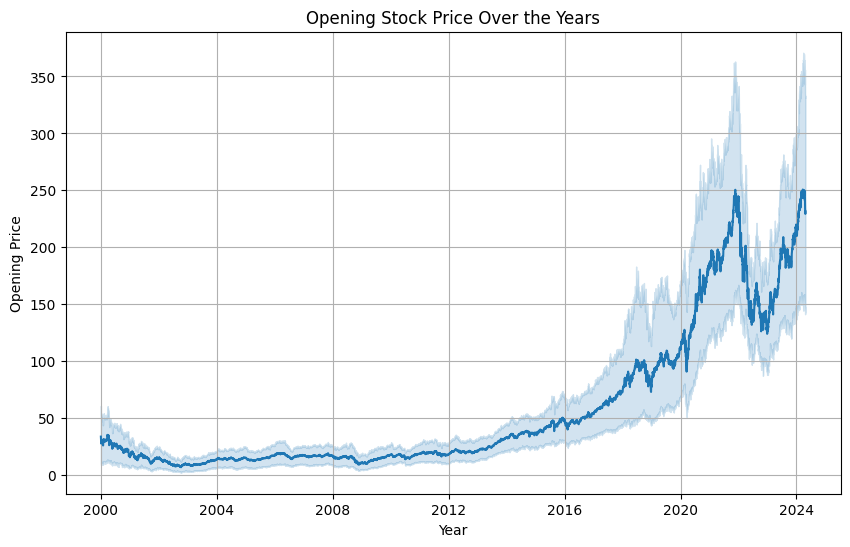

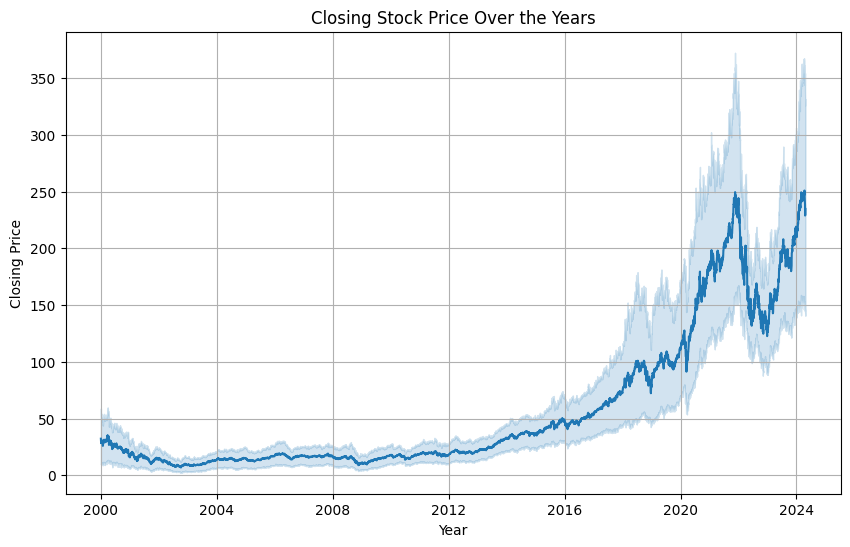

In [12]:

# Plot opening stock price over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=combined_data_df)
plt.title('Opening Stock Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()

# Plot closing stock price over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=combined_data_df)
plt.title('Closing Stock Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


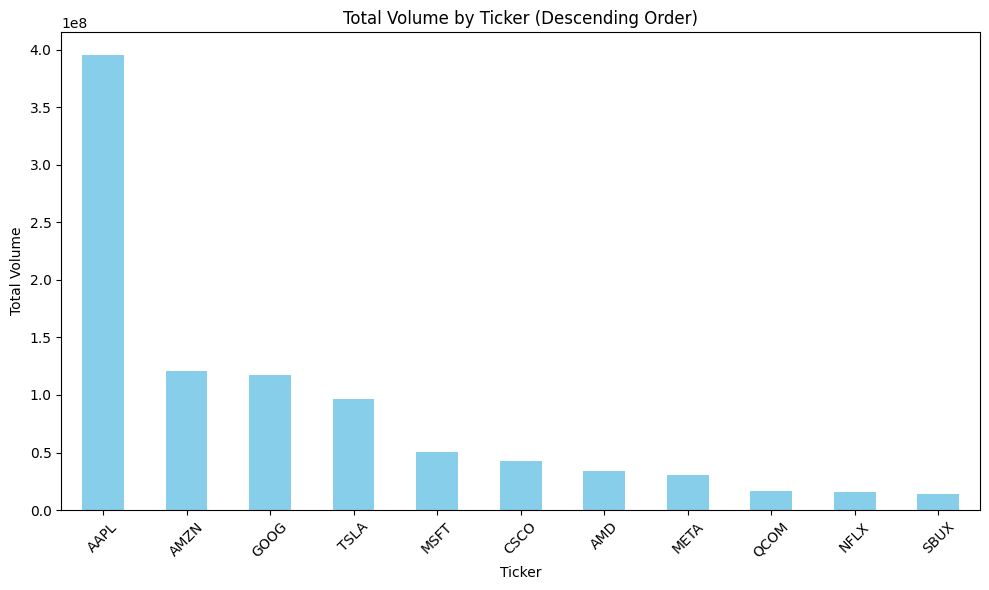

In [13]:
# Calculate total volume for each ticker
ticker_volumes = combined_data.groupby('Ticker')['Volume'].mean()

# Sort tickers based on volume in descending order
sorted_tickers = ticker_volumes.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sorted_tickers.plot(kind='bar', color='skyblue')
plt.title('Total Volume by Ticker (Descending Order)')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

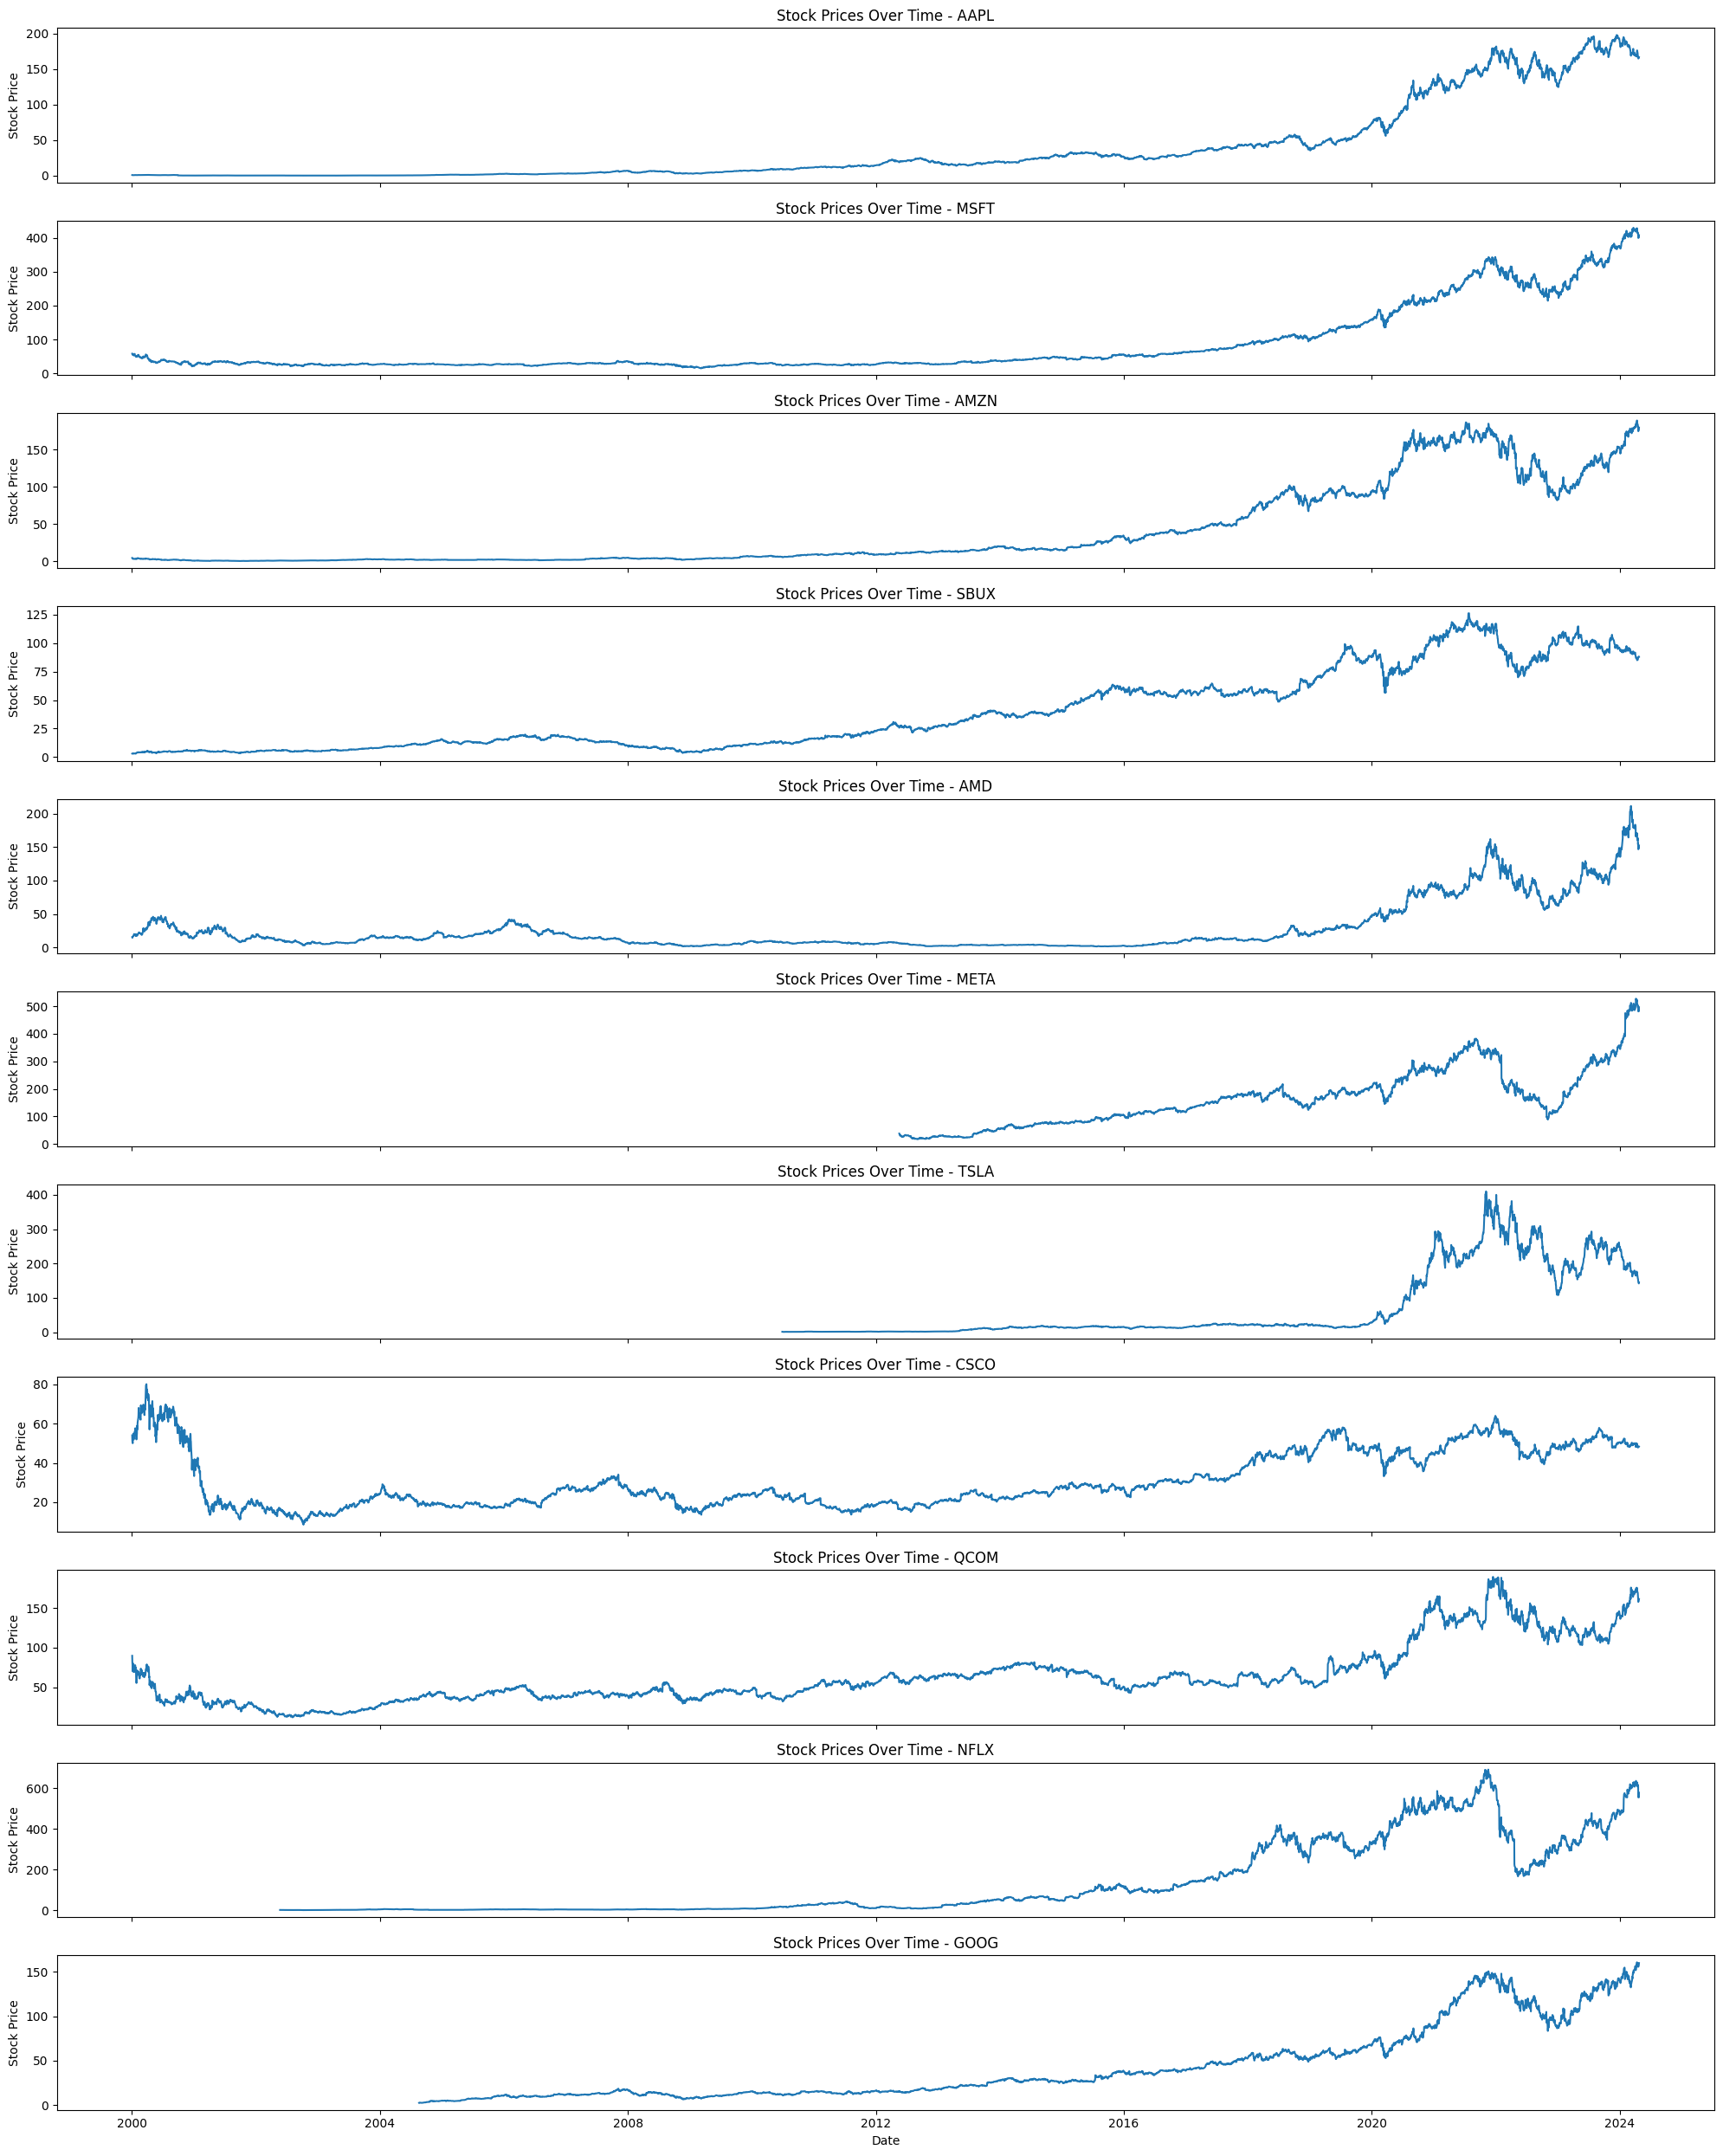

In [14]:
# Get unique companies from the 'Ticker' column
unique_companies = combined_data_df['Ticker'].unique()

# Create subplots for each company
fig, axs = plt.subplots(len(unique_companies), figsize=(20, 25), sharex=True)

# Plot stock prices for each company
for i, company in enumerate(unique_companies):
    company_data = combined_data_df[combined_data_df['Ticker'] == company]
    
    # Plot stock prices
    axs[i].plot(company_data['Date'], company_data['Close'])
    axs[i].set_ylabel('Stock Price')
    axs[i].set_title(f'Stock Prices Over Time - {company}')

# Set common x-label
plt.xlabel('Date')
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



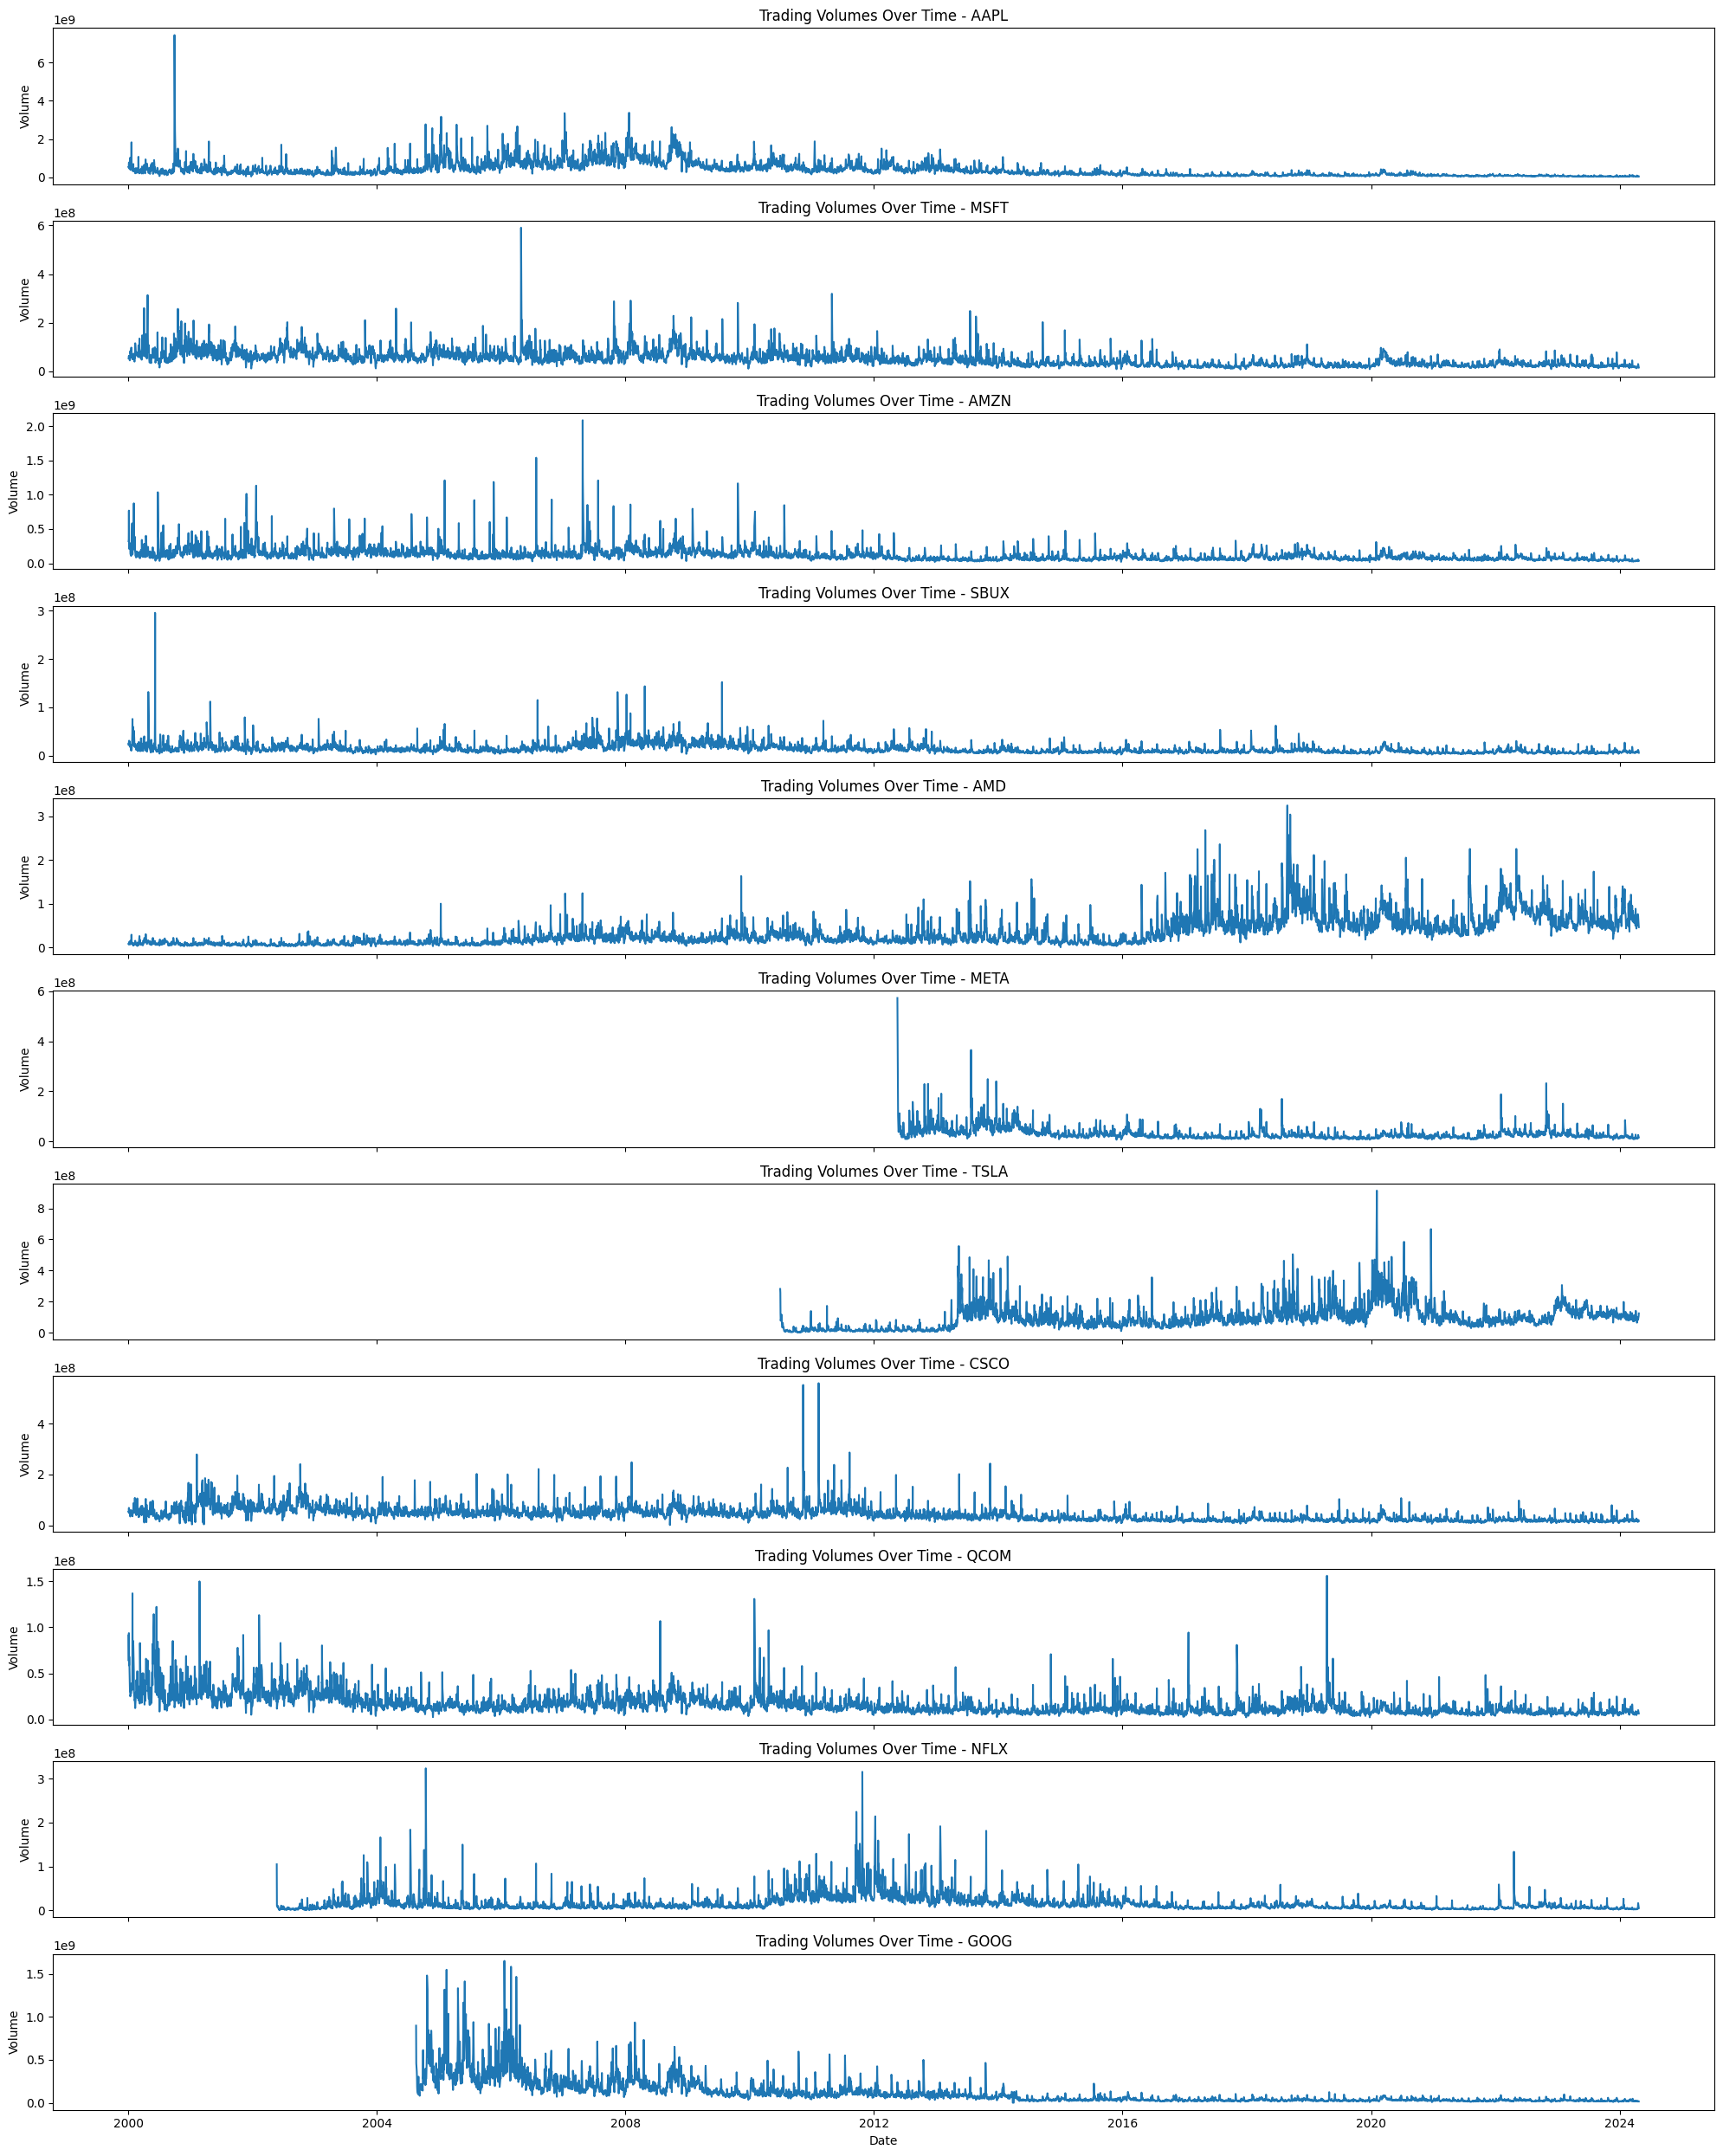

In [15]:
# Get unique companies from the 'Ticker' column
unique_companies = combined_data_df['Ticker'].unique()

# Create subplots for each company
fig, axs = plt.subplots(len(unique_companies), figsize=(20, 25), sharex=True)

# Plot trading volumes for each company
for i, company in enumerate(unique_companies):
    company_data = combined_data_df[combined_data_df['Ticker'] == company]
    
    # Plot trading volumes
    axs[i].plot(company_data['Date'], company_data['Volume'])
    axs[i].set_ylabel('Volume')
    axs[i].set_title(f'Trading Volumes Over Time - {company}')

# Set common x-label
plt.xlabel('Date')
# Adjust layout
plt.tight_layout()

# Show plots
plt.show()



### FINDINGS

### 2.2 Bivariate Analysis

### Checking for correlations between stock prices and trading volumes

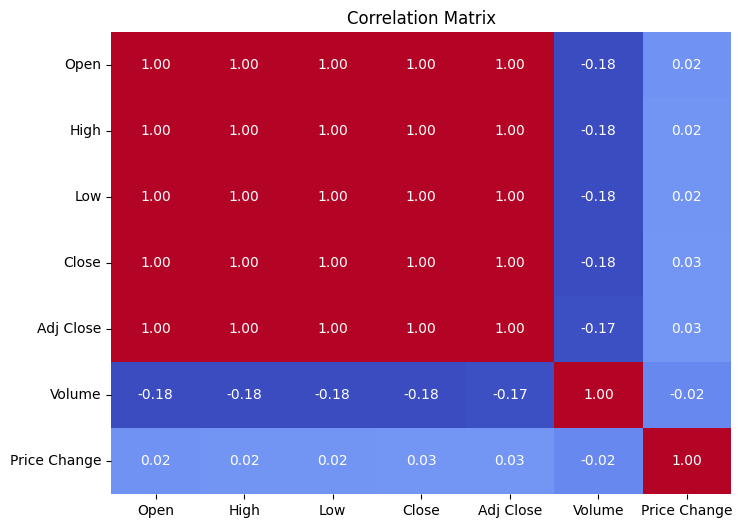

In [16]:


# Select numeric columns
numeric_columns = combined_data_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = combined_data_df[numeric_columns].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Matrix')
plt.show()


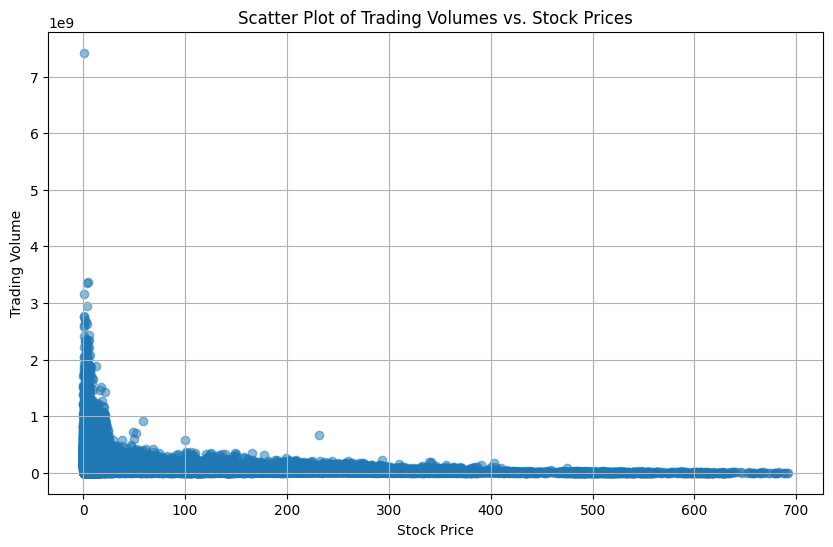

In [17]:
# Plot scatter plot of trading volumes against stock prices
plt.figure(figsize=(10, 6))
plt.scatter(combined_data_df['Close'], combined_data_df['Volume'], alpha=0.5)
plt.title('Scatter Plot of Trading Volumes vs. Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.show()


#### Exploring  the distribution of stock prices and trading volumes for each company.

####  KDE Plots

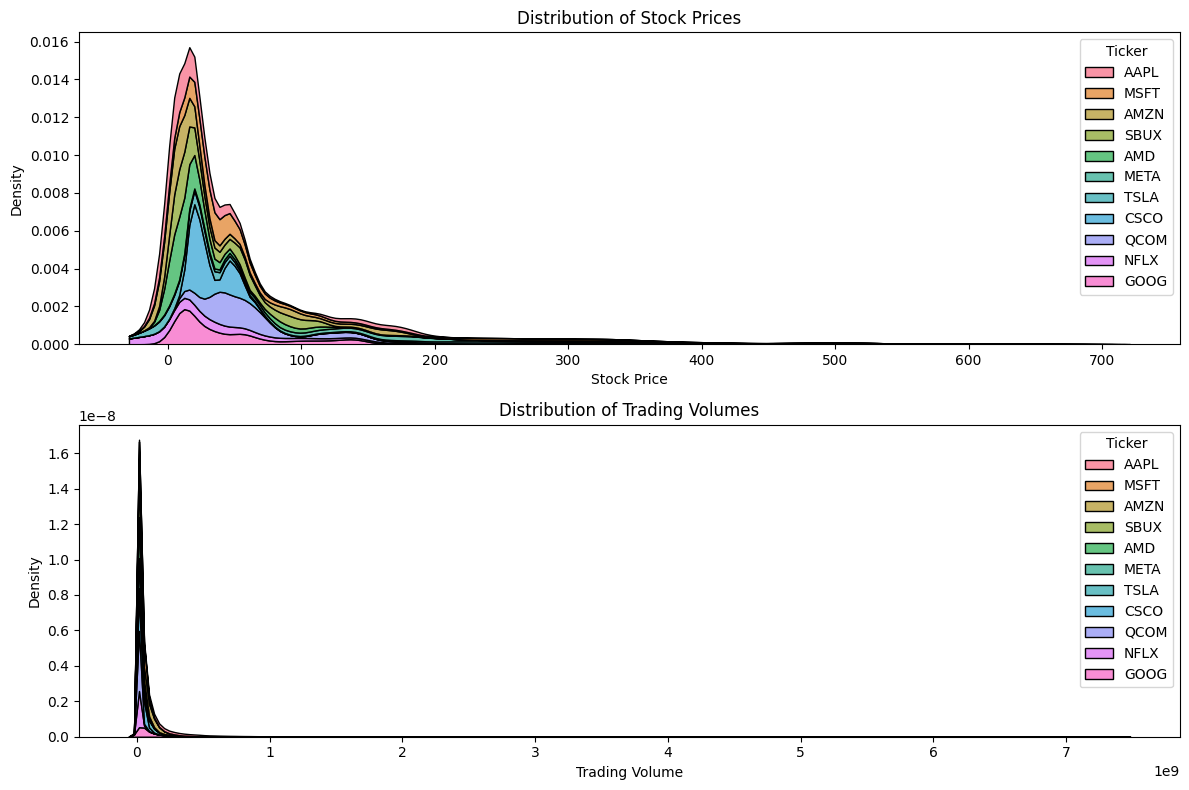

In [18]:
# Create separate subplots for stock prices and trading volumes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# KDE plot of stock prices
sns.kdeplot(data=combined_data_df, x='Close', hue='Ticker', multiple="stack", ax=axes[0], fill=True)
axes[0].set_title('Distribution of Stock Prices')
axes[0].set_xlabel('Stock Price')
axes[0].set_ylabel('Density')

# KDE plot of trading volumes
sns.kdeplot(data=combined_data_df, x='Volume', hue='Ticker', multiple="stack", ax=axes[1], fill=True)
axes[1].set_title('Distribution of Trading Volumes')
axes[1].set_xlabel('Trading Volume')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


### FINDINGS

### 2.3 Multivariate Analysis

### Investigating trends over time for individual companies and across the entire dataset.

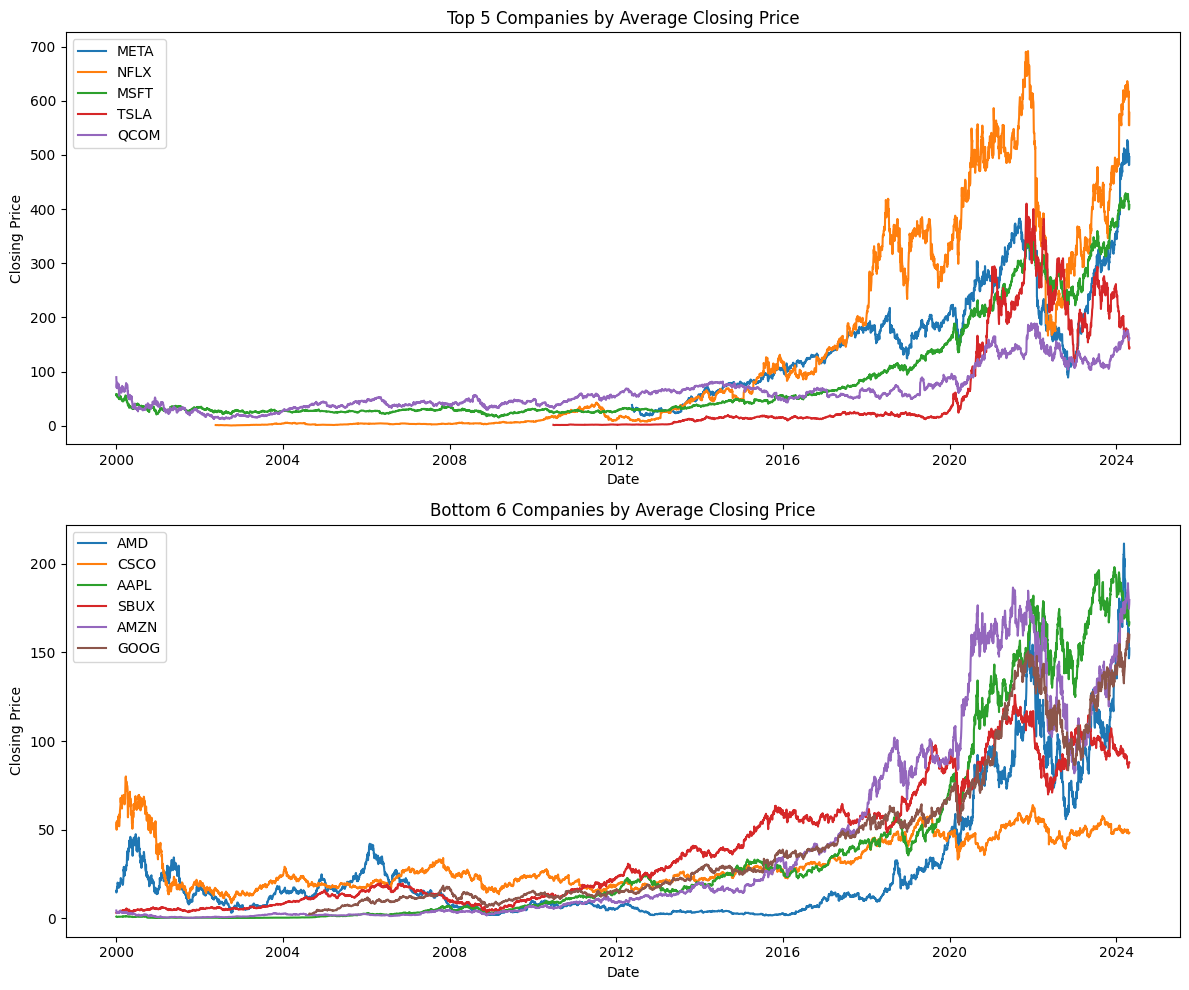

In [19]:



# Calculate average closing price for each company
average_prices = combined_data_df.groupby('Ticker')['Close'].mean()

# Select top 5 and bottom 6 companies based on average closing price
top_5_prices = average_prices.nlargest(5)
bottom_6_prices = average_prices.nsmallest(6)

# Create separate subplots for top and bottom companies
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot trends for top 5 companies based on average closing price
for company in top_5_prices.index:
    data = combined_data_df[combined_data_df['Ticker'] == company]
    axes[0].plot(data['Date'], data['Close'], label=company)

axes[0].set_title('Top 5 Companies by Average Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].legend()

# Plot trends for bottom 6 companies based on average closing price
for company in bottom_6_prices.index:
    data = combined_data_df[combined_data_df['Ticker'] == company]
    axes[1].plot(data['Date'], data['Close'], label=company)

axes[1].set_title('Bottom 6 Companies by Average Closing Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].legend()

plt.tight_layout()
plt.show()

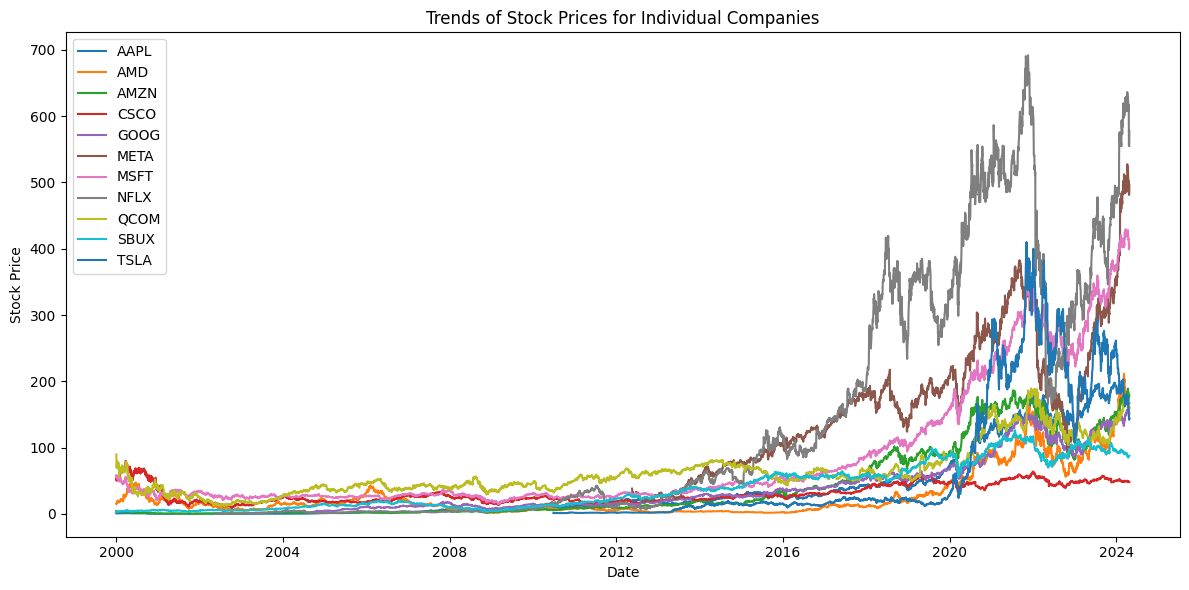

In [20]:
# Create separate subplot for stock prices
fig, ax = plt.subplots(figsize=(12, 6))

# Plot trends for each individual company (stock prices)
for company, data in combined_data_df.groupby('Ticker'):
    ax.plot(data['Date'], data['Close'], label=company)

ax.set_title('Trends of Stock Prices for Individual Companies')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.legend()

plt.tight_layout()
plt.show()


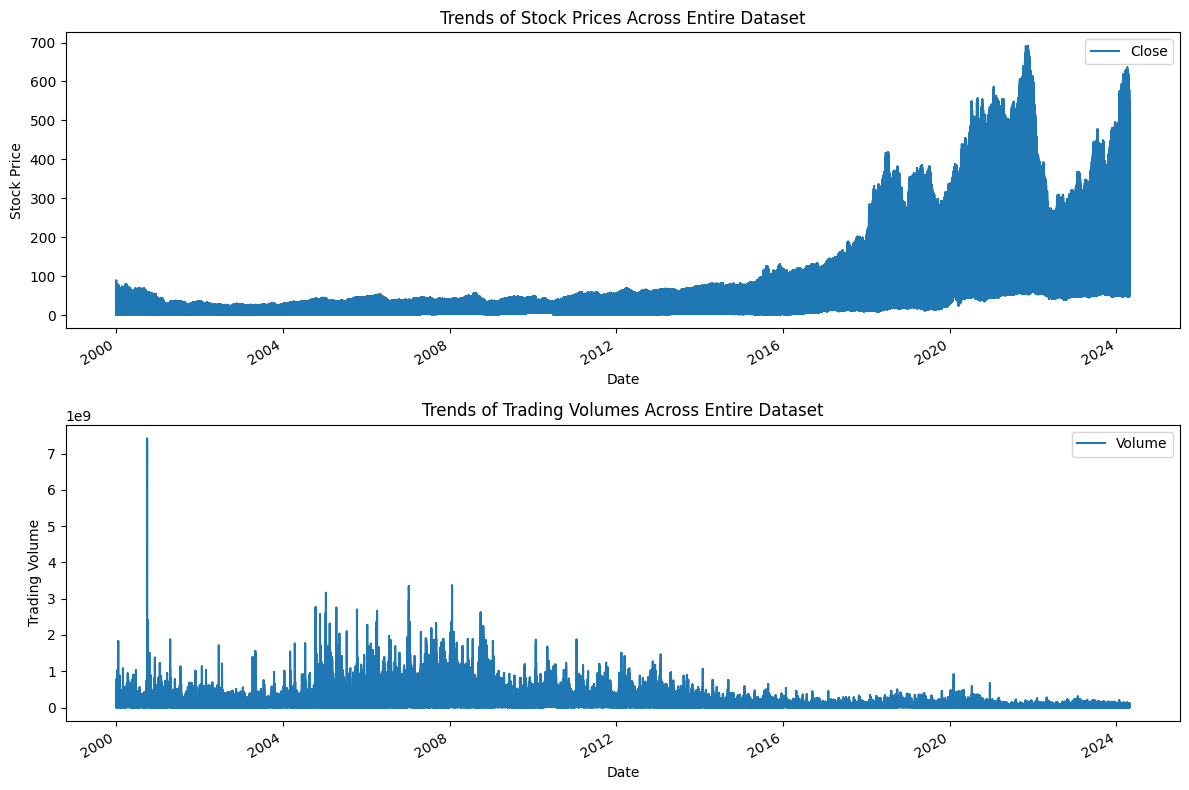

In [21]:
# Create separate subplots for stock prices and trading volumes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot trends for entire dataset (stock prices)
combined_data_df.plot(x='Date', y='Close', ax=axes[0])
axes[0].set_title('Trends of Stock Prices Across Entire Dataset')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Stock Price')

# Plot trends for entire dataset (trading volumes)
combined_data_df.plot(x='Date', y='Volume', ax=axes[1])
axes[1].set_title('Trends of Trading Volumes Across Entire Dataset')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Trading Volume')

plt.tight_layout()
plt.show()


In [22]:
# Calculate cumulative percentage change for each company
price_growth_by_company = data.groupby('Ticker')['Close'].apply(lambda x: x.pct_change().sum())

# Identify top-performing companies based on stock price growth
top_performers_price_growth = price_growth_by_company.nlargest(5)

# Identify top-performing companies based on trading volumes
top_performers_volume = data.groupby('Ticker')['Volume'].sum().nlargest(5)

print("Top Performing Companies based on Stock Price Growth:\n", top_performers_price_growth)
print("\nTop Performing Companies based on Trading Volumes:\n", top_performers_volume)


Top Performing Companies based on Stock Price Growth:
 Ticker
TSLA    6.72055
Name: Close, dtype: float64

Top Performing Companies based on Trading Volumes:
 Ticker
TSLA    337112476700
Name: Volume, dtype: int64


### FINDINGS

#  DATA PREPROCESSING

## i)Feature Engineering

a)Moving averages

In [23]:
# Calculate moving averages
def calculate_moving_average(df, window, min_periods=1):
    return df['Close'].rolling(window=window, min_periods=min_periods).mean()

# Calculate 30-day moving average with min_periods=1
combined_data_df['30_day_MA'] = calculate_moving_average(combined_data_df, window=30, min_periods=1)



In [24]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960


b)Price Volatility Measures:

In [25]:
# Calculate standard deviation
combined_data_df['Price_Std'] = combined_data_df['Close'].rolling(window=30, min_periods=1).std()



In [26]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853


c)Relative Strength Index(RSI)

In [27]:
# Calculate RSI
def calculate_rsi(data, window=14,min_periods=1):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

combined_data_df['RSI'] = calculate_rsi(combined_data_df)


In [28]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std,RSI
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,NaN
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,NaN
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,NaN
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,NaN


d)Price Momentum Indicators:

In [29]:
# Calculate MACD
short_window = 12
long_window = 26
combined_data_df['MACD'] = combined_data_df['Close'].ewm(span=short_window).mean() - combined_data_df['Close'].ewm(span=long_window).mean()


In [30]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std,RSI,MACD
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,NaN,-0.001891
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,NaN,-0.001994
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,NaN,-0.004893
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,NaN,-0.004767


e)Price Oscillators

In [31]:
# Calculate Stochastic Oscillator
def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    return (data['Close'] - low_min) / (high_max - low_min) * 100

combined_data_df['Stochastic_Oscillator'] = calculate_stochastic_oscillator(combined_data_df)


In [32]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,NaN,-0.001891,NaN
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,NaN,-0.001994,NaN
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,NaN,-0.004893,NaN
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,NaN,-0.004767,NaN


f)Volume based Indicators

In [33]:
# Calculate volume moving averages
combined_data_df['5_day_volume_MA'] = combined_data_df['Volume'].rolling(window=5).mean()


In [34]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator,5_day_volume_MA
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,NaN,-0.001891,NaN,NaN
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,NaN,-0.001994,NaN,NaN
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,NaN,-0.004893,NaN,NaN
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,NaN,-0.004767,NaN,611040640.0


g)Bollinger bands

In [35]:
# Calculate Bollinger Bands
window = 20
combined_data_df['Rolling_mean'] = combined_data_df['Close'].rolling(window=window).mean()
combined_data_df['Rolling_std'] = combined_data_df['Close'].rolling(window=window).std()
combined_data_df['Upper_band'] = combined_data_df['Rolling_mean'] + 2 * combined_data_df['Rolling_std']
combined_data_df['Lower_band'] = combined_data_df['Rolling_mean'] - 2 * combined_data_df['Rolling_std']


In [36]:
#previewing the dataset
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,30_day_MA,Price_Std,RSI,MACD,Stochastic_Oscillator,5_day_volume_MA,Rolling_mean,Rolling_std,Upper_band,Lower_band
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,0.999442,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,0.957310,0.059583,NaN,-0.001891,NaN,NaN,NaN,NaN,NaN,NaN
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,0.947731,0.045281,NaN,-0.001994,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,0.922851,0.061990,NaN,-0.004893,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,0.915960,0.055853,NaN,-0.004767,NaN,611040640.0,NaN,NaN,NaN,NaN


i)Lagged Variables

In [37]:
# Create lagged variables
combined_data_df['CloseLagged_1'] = combined_data_df['Close'].shift(1)


In [38]:
combined_data_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,Direction,...,Price_Std,RSI,MACD,Stochastic_Oscillator,5_day_volume_MA,Rolling_mean,Rolling_std,Upper_band,Lower_band,CloseLagged_1
0,AAPL,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800,NaN,No Change,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600,-0.084263,Down,...,0.059583,NaN,-0.001891,NaN,NaN,NaN,NaN,NaN,NaN,0.999442
2,AAPL,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600,0.013392,Up,...,0.045281,NaN,-0.001994,NaN,NaN,NaN,NaN,NaN,NaN,0.915179
3,AAPL,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800,-0.080357,Down,...,0.061990,NaN,-0.004893,NaN,NaN,NaN,NaN,NaN,NaN,0.928571
4,AAPL,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400,0.040179,Up,...,0.055853,NaN,-0.004767,NaN,611040640.0,NaN,NaN,NaN,NaN,0.848214


## MODELING

## GOOGLE

In [39]:
ticker = 'GOOG'
df_GOOG =yf.download(tickers = ticker)
df_GOOG.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [40]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df_GOOG.index,
                                     open=df_GOOG['Open'],
                                     high=df_GOOG['High'],
                                     low=df_GOOG['Low'],
                                     close=df_GOOG['Close'])])

fig.show()


## Drop Adj Close
To not confuse the Close and Adj Close

In [41]:
df_GOOG = df_GOOG.drop(columns='Adj Close')


## To CSV

In [42]:
df_GOOG.to_csv('data/Google_Stock_Price_Historical_Daily.csv')

In [43]:
df_google = pd.read_csv(
    'data/Google_Stock_Price_Historical_Daily.csv',
    parse_dates=['Date'], index_col=0
)

df_google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512


In [44]:
df_google['change_tomorrow'] = df_google.Close.pct_change(-1) * 100 * -1
df_google.head()

,Open,High,Low,Close,Volume,change_tomorrow
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,7.358504
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,0.996335
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,-4.319632
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,1.066023
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,1.770001


Did the stock go up or down?

In [45]:
df_google['change_tomorrow_direction'] = np.where(
    df_google.change_tomorrow > 0, 'UP', 'DOWN')

In [46]:
df_google.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      2603
DOWN    2357
Name: count, dtype: int64

<Axes: xlabel='Date'>

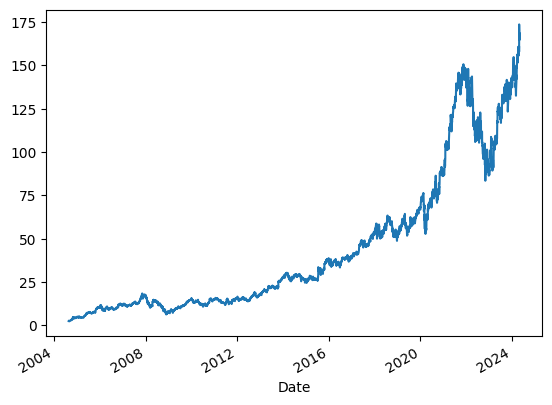

In [47]:
df_google.Close.plot()

In [48]:
df_google.to_csv('data/Google_Processed.csv', index=False)


## Machine Learning Classification model

Separate the data

Target: which variable do you want to predict?

Explanatory: which variables will you use to calculate the prediction?

In [49]:
target = df_google.change_tomorrow_direction
explanatory = df_google[['Open','High','Low','Close','Volume']]

## MODEL 1:DECISION TREE

Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [50]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

Visualize the model

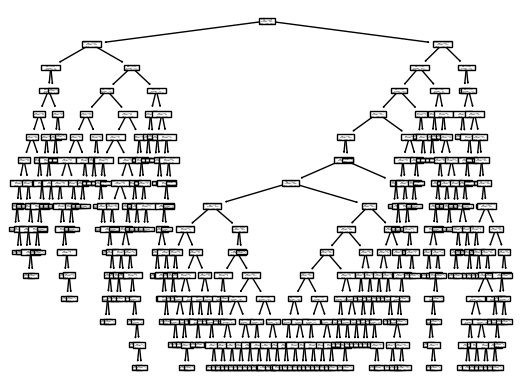

In [51]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

Calculate the predictions

In [52]:
explanatory.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512


In [53]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'DOWN', ..., 'UP', 'UP', 'DOWN'], dtype=object)

In [54]:
df_predictions = df_google[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions.head()

,change_tomorrow_direction,prediction
Date,,
2004-08-19,UP,UP
2004-08-20,UP,UP
2004-08-23,DOWN,DOWN
2004-08-24,UP,UP
2004-08-25,UP,UP


Evaluate the model: compare predictions with the reality

In [55]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction
comp.sum()

3034

In [56]:
len(comp)

4960

In [57]:
comp.sum()/len(comp)

0.6116935483870968

In [58]:
model_dt.score(explanatory,target)

0.6116935483870968

Save the model into a file
We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [59]:
import pickle

In [60]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

In [61]:
model_dt

DecisionTreeClassifier(max_depth=15)

## BACKTESTING

Create Strategy Class

In [62]:
from backtesting import Backtest, Strategy

In [63]:
df_explanatory = df_google[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [64]:
df_explanatory.iloc[-1:, :]

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-02,166.669998,168.529999,165.690002,168.460007,17016900


In [65]:
df_google.change_tomorrow_direction[-1:]

Date
2024-05-02    DOWN
Name: change_tomorrow_direction, dtype: object

Simulate the prediction for the last observation

In [66]:
model_dt.predict(X=df_explanatory)

array(['UP', 'UP', 'DOWN', ..., 'UP', 'UP', 'DOWN'], dtype=object)

In [67]:
explanatory_today = df_explanatory.iloc[[-1],:]

In [68]:
forecast_tomorrow = model_dt.predict(explanatory_today)[0]

Write the prediction process in the Strategy class

In [69]:
class ClassificationUP(Strategy):
    def init(self):
        self.model = model_dt

    def next(self):
        explanatory_today = df_explanatory.iloc[[-1],:]
        forecast_tomorrow = model_dt.predict(explanatory_today)[0]
        
        # conditions to sell or buy

Calculate Purchase Recommendation

Buy if it goes up

In [70]:
list_buy = []

In [71]:
for direction_tomorrow in df_google.change_tomorrow_direction:
    if direction_tomorrow == 'UP':
        list_buy.append(1)
    else:
        list_buy.append(0)

In [72]:
df_google['buy'] = list_buy

In [73]:
df_google.head()

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy
Date,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,7.358504,UP,1
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,0.996335,UP,1
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,-4.319632,DOWN,0
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,1.066023,UP,1
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,1.770001,UP,1


Buy if it goes and sell if down?

You can only sell if you have already bought

In [74]:
list_buy_sell = []
already_bought = False

In [75]:
for direction_tomorrow in df_google.change_tomorrow_direction:
    if direction_tomorrow == 'UP' and already_bought == False:
        list_buy_sell.append(1)
        already_bought = True
    elif direction_tomorrow == 'DOWN' and already_bought == True:
        list_buy_sell.append(-1)
        already_bought = False
    else:
        list_buy_sell.append(0)

In [76]:
df_google['buy_sell'] = list_buy_sell

In [77]:
df_google.head()

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy,buy_sell
Date,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,7.358504,UP,1,1
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,0.996335,UP,1,0
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,-4.319632,DOWN,0,-1
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,1.066023,UP,1,1
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,1.770001,UP,1,0


Add conditions to the strategy

In [78]:
class SimpleClassificationUD(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[-1:, :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        # conditions to sell or buy
        if forecast_tomorrow == 'UP' and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == 'DOWN' and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Define initial conditions

In [79]:
bt = Backtest(df_explanatory, SimpleClassificationUD,
              cash=10000, commission=.002, exclusive_orders=True)

Run backtesting

In [80]:
results = bt.run()

Interpret backtesting results

In [81]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2004-08-19 00:00:00
End,2024-05-02 00:00:00
Duration,7196 days 00:00:00
Exposure Time [%],99.959677
Equity Final [$],171797810.765513
Equity Peak [$],216436473.133765
Return [%],1717878.107655


Investing $10000 on 19th August 2004 

In [82]:
stats = bt.run()
stats 

Start                     2004-08-19 00:00:00
End                       2024-05-02 00:00:00
Duration                   7196 days 00:00:00
Exposure Time [%]                   99.959677
Equity Final [$]             171797810.765513
Equity Peak [$]              216436473.133765
Return [%]                     1717878.107655
Buy & Hold Return [%]              6640.73766
Return (Ann.) [%]                    64.12178
Volatility (Ann.) [%]                52.02889
Sharpe Ratio                         1.232426
Sortino Ratio                        3.128173
Calmar Ratio                         1.515858
Max. Drawdown [%]                  -42.300637
Avg. Drawdown [%]                   -3.374934
Max. Drawdown Duration      763 days 00:00:00
Avg. Drawdown Duration       21 days 00:00:00
# Trades                                  835
Win Rate [%]                        62.994012
Best Trade [%]                     173.061606
Worst Trade [%]                    -33.190529
Avg. Trade [%]                    

In [83]:
bt.plot();

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



## REGRESSION MODEL

In [84]:
target = df_google.change_tomorrow
explanatory = df_google[['Open','High','Low','Close','Volume']]


In [85]:
df_google.tail()

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy,buy_sell
Date,,,,,,,,,
2024-04-26,175.990005,176.419998,171.399994,173.690002,56500800,-3.448486,DOWN,0,-1
2024-04-29,170.770004,171.380005,167.059998,167.899994,35914600,-1.980074,DOWN,0,0
2024-04-30,167.380005,169.869995,164.500000,164.639999,29420800,0.561701,UP,1,1
2024-05-01,166.179993,168.809998,164.899994,165.570007,25223200,1.715540,UP,1,0
2024-05-02,166.669998,168.529999,165.690002,168.460007,17016900,NaN,DOWN,0,-1


In [86]:
# Drop NaN value in the 'change_tomorrow' column in the last row
df_google['change_tomorrow'].iloc[-1] = df_google['change_tomorrow'].iloc[-2]

df_google.tail()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17168\1124918229.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction,buy,buy_sell
Date,,,,,,,,,
2024-04-26,175.990005,176.419998,171.399994,173.690002,56500800,-3.448486,DOWN,0,-1
2024-04-29,170.770004,171.380005,167.059998,167.899994,35914600,-1.980074,DOWN,0,0
2024-04-30,167.380005,169.869995,164.500000,164.639999,29420800,0.561701,UP,1,1
2024-05-01,166.179993,168.809998,164.899994,165.570007,25223200,1.715540,UP,1,0
2024-05-02,166.669998,168.529999,165.690002,168.460007,17016900,1.715540,DOWN,0,-1


Compute the model

The following model will predict the numerical increase of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

In [87]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeRegressor(max_depth=15)

Calculate the predictions

In [88]:
y_pred = model_dt.predict(X=explanatory)
df_predictions = df_google[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions.head()

,change_tomorrow,prediction
Date,,
2004-08-19,7.358504,7.358504
2004-08-20,0.996335,0.996335
2004-08-23,-4.319632,-4.319632
2004-08-24,1.066023,1.066023
2004-08-25,1.770001,1.770001


Evaluate the model: compare predictions with the reality

In [89]:
error = df_predictions.change_tomorrow - df_predictions.prediction
error.sum().round(2)

-0.0

In [90]:
error_squared = error**2
error_squared.sum()

12943.468555758229

In [91]:
error_squared_mean = error_squared.mean()
error_squared_mean

2.6095702733383526

In [92]:
import numpy as np

rmse = np.sqrt(error_squared_mean)
rmse

1.6154164396026036

In [93]:
error.std()

1.615579308629544

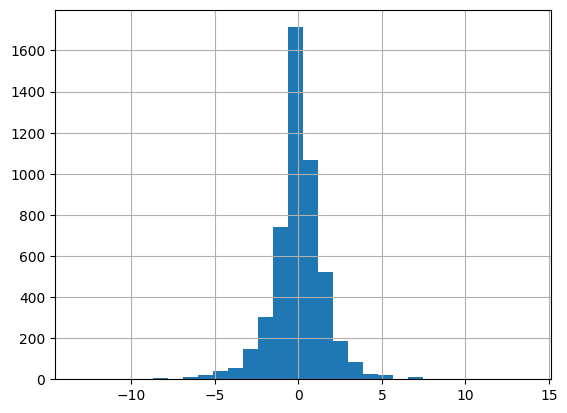

In [94]:
error.hist(bins=30);

The average error of the model is approximately 1.6

Save the model into a file
We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [95]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

## BACKTESTING

In [96]:
model_dt

DecisionTreeRegressor(max_depth=15)

Create your Strategy Class

In [97]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -5 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Define initial conditions

In [98]:
df_explanatory = df_google[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [99]:
df_explanatory.iloc[-1:, :]

,Open,High,Low,Close,Volume
Date,,,,,
2024-05-02,166.669998,168.529999,165.690002,168.460007,17016900


In [100]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

Run backtesting

In [101]:
results = bt.run()

Interpret backtesting results

In [102]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2004-08-19 00:00:00
End,2024-05-02 00:00:00
Duration,7196 days 00:00:00
Exposure Time [%],99.919355
Equity Final [$],2499218.668829
Equity Peak [$],2604483.632895
Return [%],24892.186688


Visualize the strategy performance

In [103]:
stats = bt.run()
stats 

Start                     2004-08-19 00:00:00
End                       2024-05-02 00:00:00
Duration                   7196 days 00:00:00
Exposure Time [%]                   99.919355
Equity Final [$]               2499218.668829
Equity Peak [$]                2604483.632895
Return [%]                       24892.186688
Buy & Hold Return [%]              6640.73766
Return (Ann.) [%]                   32.380472
Volatility (Ann.) [%]                40.59517
Sharpe Ratio                         0.797643
Sortino Ratio                        1.676563
Calmar Ratio                         0.652999
Max. Drawdown [%]                  -49.587312
Avg. Drawdown [%]                   -4.219774
Max. Drawdown Duration     1837 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   31
Win Rate [%]                        74.193548
Best Trade [%]                     813.602171
Worst Trade [%]                    -24.035177
Avg. Trade [%]                    

In [104]:
bt.plot(filename='reports_backtesting/backtesting_regression.html')

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1636', ...)

Simple Investment Strategy

In [105]:
class Regression(Strategy):
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < -5 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Create backtest class

In [106]:
df_explanatory = df_google[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

In [107]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

RUN BACKTESTING WITH SPECIFIC STRATEGY

In [108]:
model_dt.predict(df_explanatory)

array([ 7.35850421,  0.99633507, -4.31963221, ..., -1.06678832,
        1.71554035,  1.71554035])

In [109]:
results = bt.run()

Interpret backtesting results

In [110]:
results.to_frame(name='Values').loc[:'Return [%]']

,Values
Start,2004-08-19 00:00:00
End,2024-05-02 00:00:00
Duration,7196 days 00:00:00
Exposure Time [%],99.919355
Equity Final [$],2499218.668829
Equity Peak [$],2604483.632895
Return [%],24892.186688


In [111]:
stats = bt.run()
stats

Start                     2004-08-19 00:00:00
End                       2024-05-02 00:00:00
Duration                   7196 days 00:00:00
Exposure Time [%]                   99.919355
Equity Final [$]               2499218.668829
Equity Peak [$]                2604483.632895
Return [%]                       24892.186688
Buy & Hold Return [%]              6640.73766
Return (Ann.) [%]                   32.380472
Volatility (Ann.) [%]                40.59517
Sharpe Ratio                         0.797643
Sortino Ratio                        1.676563
Calmar Ratio                         0.652999
Max. Drawdown [%]                  -49.587312
Avg. Drawdown [%]                   -4.219774
Max. Drawdown Duration     1837 days 00:00:00
Avg. Drawdown Duration       35 days 00:00:00
# Trades                                   31
Win Rate [%]                        74.193548
Best Trade [%]                     813.602171
Worst Trade [%]                    -24.035177
Avg. Trade [%]                    

In [112]:
bt.plot();

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



## Parametrize the Investment Strategy

Create strategy class

In [113]:
class Regression(Strategy):
    
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Create Backtest class

In [114]:
bt = Backtest(df_explanatory, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

Optimize backtesting with multiple combinations

In [115]:
list_limits_buy = list(range(0, 11, 1))
list_limits_buy 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [116]:
list_limits_sell = list(range(0, -11, -1))
list_limits_sell 

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10]

In [117]:
import time
import traceback

try:
    start_time = time.time()

    # Your code that might raise a KeyboardInterrupt or encounter a long-running process
    results = bt.optimize(
        limit_buy=list_limits_buy, limit_sell=list_limits_sell,
        maximize='Return [%]', return_heatmap=True
    )

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time: {:.2f} seconds".format(execution_time))

    # Continue with the rest of your code using the results

except KeyboardInterrupt:
    print("Execution interrupted by the user.")

except Exception as e:
    print("An error occurred:")
    print(traceback.format_exc())  # Print the full trace


 20%|██        | 1/5 [06:37<26:29, 397.34s/it]c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_stats.py:114: RuntimeWarning:

overflow encountered in scalar power



Execution time: 887.26 seconds


[ ] Interpret backtesting results

In [118]:
results_heatmap = results[1]
df_results_heatmap = results_heatmap.reset_index()

In [119]:
dff = df_results_heatmap.pivot(
    index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,7550.192984,9893.616368,10171.917512,14817.019756,15872.123288,25317.298020,104378.255235,276009.368080,729282.015408,1.133969e+06,3.816344e+06
1,10143.601293,8011.988733,7000.212871,14135.298682,15142.130027,24892.186688,63308.838255,83891.853545,208245.840494,1.676582e+05,-1.000000e+02
2,10481.922946,8450.178751,7381.960710,13343.642947,14295.327261,32367.389805,99155.350559,100149.951917,120963.039990,5.342751e+04,-1.000000e+02
3,9906.928843,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02
4,7593.499393,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02
5,7151.844823,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02
6,9631.871122,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02
7,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02
8,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-1.000000e+02,-1.000000e+02


In [120]:
dff.sort_index(axis=1, ascending=False)

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,3.816344e+06,1.133969e+06,729282.015408,276009.368080,104378.255235,25317.298020,15872.123288,14817.019756,10171.917512,9893.616368,7550.192984
1,-1.000000e+02,1.676582e+05,208245.840494,83891.853545,63308.838255,24892.186688,15142.130027,14135.298682,7000.212871,8011.988733,10143.601293
2,-1.000000e+02,5.342751e+04,120963.039990,100149.951917,99155.350559,32367.389805,14295.327261,13343.642947,7381.960710,8450.178751,10481.922946
3,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,9906.928843
4,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,7593.499393
5,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,7151.844823
6,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,9631.871122
7,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
8,-1.000000e+02,-1.000000e+02,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000


DataFrame heatmaps for better reporting

In [121]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient()

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,3816344,1133969,729282,276009,104378,25317,15872,14817,10172,9894,7550
1,-100,167658,208246,83892,63309,24892,15142,14135,7000,8012,10144
2,-100,53428,120963,100150,99155,32367,14295,13344,7382,8450,10482
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,9907
4,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,7593
5,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,7152
6,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,9632
7,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
8,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100


In [122]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,3816344,1133969,729282,276009,104378,25317,15872,14817,10172,9894,7550
1,-100,167658,208246,83892,63309,24892,15142,14135,7000,8012,10144
2,-100,53428,120963,100150,99155,32367,14295,13344,7382,8450,10482
3,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,9907
4,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,7593
5,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,7152
6,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,9632
7,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
8,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100


## smart optimization

to save computing time

Create Strategy class

In [123]:
class Regression(Strategy):
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = model_dt
        self.already_bought = False

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Create Backtest class

In [124]:
df_explanatory = df_google[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

Optimize backtesting with multiple combinations

In [125]:
import multiprocessing as mp

# Check if the multiprocessing context has already been set
if mp.get_start_method(allow_none=True) is None:
    # Set the multiprocessing start method
    mp.set_start_method('fork')


In [126]:
stats_skopt, heatmap, optimize_result = bt.optimize(
    limit_buy=[0, 10],
    limit_sell=[-10, 0],
    maximize='Return [%]',
    method='skopt',
    max_tries=500,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/500 [00:00<?, ?it/s]

Backtest.optimize:   3%|▎         | 13/500 [01:21<48:53,  6.02s/it]  c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_stats.py:114: RuntimeWarning:

overflow encountered in scalar power

Backtest.optimize:   5%|▌         | 25/500 [02:31<42:53,  5.42s/it]c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning:

The objective has been evaluated at point [2, -2] before, using random point [0, -9]

Backtest.optimize:   5%|▌         | 26/500 [02:44<59:39,  7.55s/it]

Which are the best values for the parameters?

In [127]:
dff = heatmap.reset_index()
dff = dff.pivot(index='limit_buy', columns='limit_sell', values='Return [%]')
dff

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,NaN,9893.616368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,14135.298682,NaN,24892.186688,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,14295.327261,NaN,99155.350559,NaN,120963.03999,NaN,NaN
3,NaN,NaN,-100.0,NaN,NaN,NaN,NaN,-100.0,NaN,-100.0,NaN
4,7593.499393,NaN,NaN,NaN,NaN,NaN,NaN,-100.0,-100.00000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,-100.000000,NaN,NaN,NaN,-100.0,-100.0
6,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,-100.000000,NaN,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-100.0
8,NaN,NaN,NaN,NaN,-100.000000,-100.000000,NaN,-100.0,NaN,NaN,NaN


In [128]:
dff.style.highlight_null(props='background-color: transparent; color: transparent')

limit_sell,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
limit_buy,,,,,,,,,,,
0,nan,9893.616368,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,14135.298682,nan,24892.186688,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,14295.327261,nan,99155.350559,nan,120963.039990,nan,nan
3,nan,nan,-100.000000,nan,nan,nan,nan,-100.000000,nan,-100.000000,nan
4,7593.499393,nan,nan,nan,nan,nan,nan,-100.000000,-100.000000,nan,nan
5,nan,nan,nan,nan,nan,-100.000000,nan,nan,nan,-100.000000,-100.000000
6,nan,-100.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,-100.000000,nan,-100.000000,nan,nan,nan,nan,nan,nan,-100.000000
8,nan,nan,nan,nan,-100.000000,-100.000000,nan,-100.000000,nan,nan,nan


In [129]:
dff.sort_index(axis=1, ascending=False)\
    .style.format(precision=0)\
    .background_gradient(vmin=np.nanmin(dff), vmax=np.nanmax(dff))\
    .highlight_null(props='background-color: transparent; color: transparent')

limit_sell,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10
limit_buy,,,,,,,,,,,
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,9894,nan
1,nan,nan,nan,nan,nan,24892,nan,14135,nan,nan,nan
2,nan,nan,120963,nan,99155,nan,14295,nan,nan,nan,nan
3,nan,-100,nan,-100,nan,nan,nan,nan,-100,nan,nan
4,nan,nan,-100,-100,nan,nan,nan,nan,nan,nan,7593
5,-100,-100,nan,nan,nan,-100,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,-100,nan
7,-100,nan,nan,nan,nan,nan,nan,-100,nan,-100,nan
8,nan,nan,nan,-100,nan,-100,-100,nan,nan,nan,nan


How to interpret smart optimization?
Number of evaluations

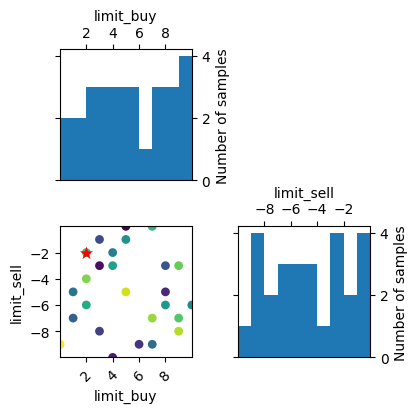

In [130]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

Density

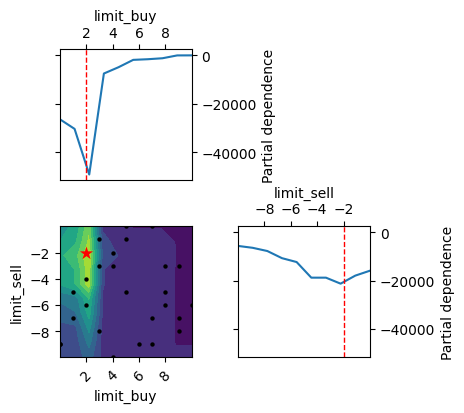

In [131]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

## The overfitting problem

Separate the data
Target: which variable do you want to predict?
Explanatory: which variables will you use to calculate the prediction?

In [132]:
target = df_google.change_tomorrow
explanatory = df_google[['Open','High','Low','Close','Volume']]

Feature selection
Target: which variable do you want to predict?
Explanatory: which variables will you use to calculate the prediction?

In [133]:
y = df_google.change_tomorrow
X = df_google[['Open','High','Low','Close','Volume']]

Train test split
Split the dataset

In [134]:
n_days = len(df_google.index)
n_days

4960

In [135]:
n_days_split = int(n_days*0.7)
n_days_split

3472

In [136]:
X_train, y_train = X.iloc[:n_days_split], y.iloc[:n_days_split]
X_test, y_test = X.iloc[n_days_split:], y.iloc[n_days_split:]

Fit the model on train set

In [137]:
from sklearn.tree import DecisionTreeRegressor

In [138]:
model_dt_split = DecisionTreeRegressor(max_depth=15, random_state=42)

In [139]:
model_dt_split.fit(X=X_train, y=y_train)

DecisionTreeRegressor(max_depth=15, random_state=42)

Evaluate model



On test set

In [140]:
from sklearn.metrics import mean_squared_error

y_pred_test = model_dt_split.predict(X=X_test)
mean_squared_error(y_true=y_test, y_pred=y_pred_test)

4.875954450246462

on train set

In [141]:
y_pred_train = model_dt_split.predict(X=X_train)
mean_squared_error(y_true=y_train, y_pred=y_pred_train)

2.0082663439131174

Backtesting

Create strategy class

In [142]:
class Regression(Strategy):
    limit_buy = 1
    limit_sell = -5
    
    def init(self):
        self.model = DecisionTreeRegressor(max_depth=15, random_state=42)
        self.already_bought = False
        
        self.model.fit(X=X_train, y=y_train)

    def next(self):
        explanatory_today = self.data.df.iloc[[-1], :]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]
        
        if forecast_tomorrow > self.limit_buy and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow < self.limit_sell and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

Run the backtest on test data

In [143]:
bt_test = Backtest(X_test, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

In [144]:
results = bt_test.run(limit_buy=1, limit_sell=-5)

df_results_test = results.to_frame(name='Values').loc[:'Return [%]']\
    .rename({'Values':'Out of Sample (Test)'}, axis=1)
df_results_test

,Out of Sample (Test)
Start,2018-06-05 00:00:00
End,2024-05-02 00:00:00
Duration,2158 days 00:00:00
Exposure Time [%],99.865591
Equity Final [$],23383.873014
Equity Peak [$],24366.673612
Return [%],133.83873


Run the backtest on train data

In [145]:
bt_train = Backtest(X_train, Regression,
              cash=10000, commission=.002, exclusive_orders=True)

results = bt_train.run(limit_buy=1, limit_sell=-5)

df_results_train = results.to_frame(name='Values').loc[:'Return [%]']\
    .rename({'Values':'In Sample (Train)'}, axis=1)
df_results_train

,In Sample (Train)
Start,2004-08-19 00:00:00
End,2018-06-04 00:00:00
Duration,5037 days 00:00:00
Exposure Time [%],99.884793
Equity Final [$],924511.698111
Equity Peak [$],1036609.48088
Return [%],9145.116981


Compare both backtests
In the same DataFrame
HINT: Concatenate the previous DataFrames

In [146]:
df_results = pd.concat([df_results_train, df_results_test], axis=1)
df_results

,In Sample (Train),Out of Sample (Test)
Start,2004-08-19 00:00:00,2018-06-05 00:00:00
End,2018-06-04 00:00:00,2024-05-02 00:00:00
Duration,5037 days 00:00:00,2158 days 00:00:00
Exposure Time [%],99.884793,99.865591
Equity Final [$],924511.698111,23383.873014
Equity Peak [$],1036609.48088,24366.673612
Return [%],9145.116981,133.83873


Plot both backtest reports

In [147]:
bt_test.plot(filename='reports_backtesting/regression_test_set.html')
bt_train.plot(filename='reports_backtesting/regression_train_set.html')

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'



c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\e

GridPlot(id='p2632', ...)

In [148]:
stats = bt_test.run()
stats

Start                     2018-06-05 00:00:00
End                       2024-05-02 00:00:00
Duration                   2158 days 00:00:00
Exposure Time [%]                   99.865591
Equity Final [$]                 23383.873014
Equity Peak [$]                  24366.673612
Return [%]                          133.83873
Buy & Hold Return [%]              195.632034
Return (Ann.) [%]                   15.472292
Volatility (Ann.) [%]               36.270408
Sharpe Ratio                         0.426582
Sortino Ratio                        0.724294
Calmar Ratio                         0.347721
Max. Drawdown [%]                   -44.49625
Avg. Drawdown [%]                   -4.386631
Max. Drawdown Duration      798 days 00:00:00
Avg. Drawdown Duration       42 days 00:00:00
# Trades                                   13
Win Rate [%]                        38.461538
Best Trade [%]                     167.189231
Worst Trade [%]                     -8.740971
Avg. Trade [%]                    

In [149]:
stats = bt_train.run()
stats

Start                     2004-08-19 00:00:00
End                       2018-06-04 00:00:00
Duration                   5037 days 00:00:00
Exposure Time [%]                   99.884793
Equity Final [$]                924511.698111
Equity Peak [$]                 1036609.48088
Return [%]                        9145.116981
Buy & Hold Return [%]             2179.370402
Return (Ann.) [%]                   38.895185
Volatility (Ann.) [%]               41.390109
Sharpe Ratio                         0.939722
Sortino Ratio                        2.174037
Calmar Ratio                         0.784373
Max. Drawdown [%]                  -49.587628
Avg. Drawdown [%]                   -4.303429
Max. Drawdown Duration     1837 days 00:00:00
Avg. Drawdown Duration       34 days 00:00:00
# Trades                                   35
Win Rate [%]                        71.428571
Best Trade [%]                     207.512336
Worst Trade [%]                    -24.035177
Avg. Trade [%]                    

In [150]:
bt.plot();

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



## MODEL 2:RANDOM FOREST

In [151]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train = df_google.iloc[:-100]
test = df_google.iloc[-100:]

predictors = ["Close","Open","High","Low","Volume"]
model.fit(train[predictors],train['buy'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [152]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [153]:
preds = pd.Series(preds , index=test.index)

In [154]:
precision_score(test["buy"],preds)

0.6285714285714286

In [155]:
combined = pd.concat([test["buy"],preds],axis=1)

<Axes: xlabel='Date'>

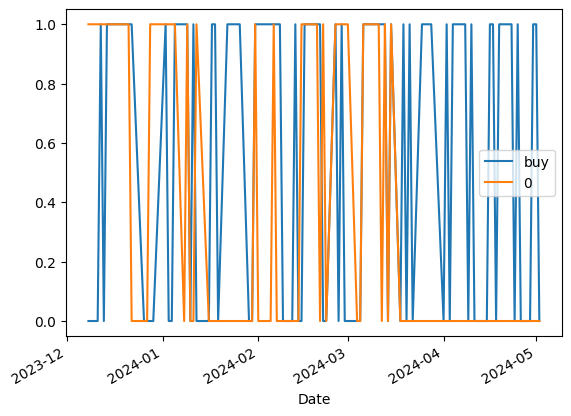

In [156]:
combined.plot()

## BACKTESTING

In [157]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["buy"])
    preds= model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["buy"], preds], axis = 1)
    return combined

In [158]:
def backtest (data,model,predictors,start=2500,step=250):
    all_predictions = []

    for i in range(start,data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [159]:
predictions = backtest(df_google, model, predictors)

In [160]:
predictions["predictions"].value_counts()

predictions
0    1310
1    1150
Name: count, dtype: int64

In [161]:
precision_score(predictions["buy"], predictions["predictions"])

0.5165217391304348

In [162]:
predictions["buy"].value_counts()/predictions.shape[0]

buy
1    0.53374
0    0.46626
Name: count, dtype: float64

In [163]:
horizons = [2,5,60,250,1000]

In [164]:
# Dropping the 'change_tomorrow_direction' column
df_google= df_google.drop(columns=['change_tomorrow_direction'])

In [165]:
df_google

,Open,High,Low,Close,Volume,change_tomorrow,buy,buy_sell
Date,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,897427216,7.358504,1,1
2004-08-20,2.515820,2.716817,2.503118,2.697639,458857488,0.996335,1,0
2004-08-23,2.758411,2.826406,2.716070,2.724787,366857939,-4.319632,0,-1
2004-08-24,2.770615,2.779581,2.579581,2.611960,306396159,1.066023,1,1
2004-08-25,2.614201,2.689918,2.587302,2.640104,184645512,1.770001,1,0
...,...,...,...,...,...,...,...,...
2024-04-26,175.990005,176.419998,171.399994,173.690002,56500800,-3.448486,0,-1
2024-04-29,170.770004,171.380005,167.059998,167.899994,35914600,-1.980074,0,0
2024-04-30,167.380005,169.869995,164.500000,164.639999,29420800,0.561701,1,1


In [166]:

new_predictors = []
for horizon in horizons:
    rolling_averages = df_google.rolling(horizon).mean()
    ratio_column = f"Close_ratio_{horizon}"
    df_google[ratio_column]= df_google["Close"]/rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df_google[trend_column]= df_google.shift(1).rolling(horizon).sum()["buy"]

    new_predictors += [ratio_column,trend_column]
    

In [167]:
model = RandomForestClassifier(n_estimators=250,min_samples_split=100,random_state=1)


In [168]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["buy"])
    preds= model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds [preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["buy"], preds], axis = 1)
    return combined

In [169]:
predictions = backtest(df_google, model, new_predictors)

In [170]:
predictions["predictions"].value_counts()

predictions
0.0    2317
1.0     143
Name: count, dtype: int64

In [171]:
precision_score(predictions["buy"], predictions["predictions"])

0.5734265734265734

## MODEL 3:Long Short-Term Memory (LSTM) Networks:

In [172]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [173]:
df = df_google

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [174]:

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

In [175]:
# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Number of timesteps to look back
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape the data to be 3-dimensional [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model

In [176]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [177]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

Epoch 1/100


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0045
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 2.9936e-04
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 2.4433e-04
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 2.2207e-04
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 1.9924e-04
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1.6736e-04
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 1.9798e-04
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.8124e-04
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 1.6839e-04
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 1.7230e-04
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 1.3453e-04
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 1.6167e-04
Epoch 13/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 1.4572e-04
Epoch 14/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step -

In [178]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [179]:
from sklearn.metrics import precision_score, mean_squared_error
import math

# Convert predictions to original scale
test_predictions_orig = scaler.inverse_transform(test_predictions)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate precision score
# Convert predictions to binary labels (1 for increase, 0 for decrease)
test_labels_pred = np.where(test_predictions_orig > np.roll(test_predictions_orig, shift=1), 1, 0)
y_test_labels = np.where(y_test_orig > np.roll(y_test_orig, shift=1), 1, 0)

precision = precision_score(y_test_labels[1:], test_labels_pred[1:])
print("Precision Score:", precision)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_orig, test_predictions_orig))
print("RMSE:", rmse)


Precision Score: 0.5277777777777778
RMSE: 20430.34104804519


In [189]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the stock price data
# Replace 'your_data.csv' with the path to your dataset
df = df_google

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        X.append(dataset[i:(i+look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # Number of timesteps to look back
X, y = create_dataset(scaled_data, look_back)

# Reshape the data to be 3-dimensional [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model using tf.keras
def create_model(units=50, dropout_rate=0.2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=units, return_sequences=True, input_shape=(X.shape[1], 1)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.LSTM(units=units, return_sequences=False))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define custom scoring function for GridSearchCV
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return -mse  # Minimize MSE (negative of MSE)

# Define the grid search parameters
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.3]
}

# Perform grid search
best_score = float('-inf')
best_params = None
for units in param_grid['units']:
    for dropout_rate in param_grid['dropout_rate']:
        model = create_model(units=units, dropout_rate=dropout_rate)
        model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        score = custom_scorer(model, X, y)
        if score > best_score:
            best_score = score
            best_params = {'units': units, 'dropout_rate': dropout_rate}

# Summarize results
print("Best: %f using %s" % (best_score, best_params))


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
Best: -0.000137 using {'units': 50, 'dropout_rate': 0.2}


In [190]:
from sklearn.metrics import mean_squared_error

# Using the best model obtained from grid search
best_model = create_model(units=best_params['units'], dropout_rate=best_params['dropout_rate'])
best_model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Predicting on the test data
y_pred = best_model.predict(X)

# Calculating RMSE
rmse = mean_squared_error(y, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
Root Mean Squared Error (RMSE): 0.013287148207474278


c:\Users\ADMIN\anaconda3\envs\learn-env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [192]:
from sklearn.metrics import r2_score, mean_absolute_error

# Compute R-squared
r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)


R-squared: 0.9969256009794504
Mean Absolute Error (MAE): 0.008985108329472148


In [ ]:
with open('models/model_lstm_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)

The RMSE value is approximately 0.013. This indicates the average deviation of the predictions from the actual values is around 0.013 units.

 R-squared value of 0.9969 suggests that the model explains approximately 99.69% of the variance in the target variable.
 This is exceptionally high, indicating that the model fits the data extremely well.

 MAE of 0.0089 suggests that, on average, the model's predictions are approximately 0.0089 units away from the actual values.  The low MAE indicates good model performance.

## EVALUATION

**Performance Metrics:**

Calculate evaluation metrics to assess the performance of the portfolio recommendation system. Common metrics include:
Accuracy: Percentage of correct predictions.
Precision: Proportion of true positive predictions among all positive predictions.
Recall: Proportion of true positive predictions among all actual positives.
F1-score: Harmonic mean of precision and recall.
AUC-ROC: Area under the receiver operating characteristic curve.

**Backtesting:**

Conduct backtesting to assess the historical performance of the recommended portfolios. Simulate portfolio returns based on the recommendations and compare them with benchmark portfolios or market indices.


**Risk Analysis:**

Evaluate the risk associated with the recommended portfolios by analyzing metrics such as volatility, maximum drawdown, Sharpe ratio, or value at risk (VaR).

Evaluation   
                                                                                                                                                       Accuracy Metrics:
Calculate metrics such as accuracy, precision, recall, and F1-score to assess the model's ability to correctly predict stock price movements.
Use confusion matrices to visualize true positives, true negatives, false positives, and false negatives.
Risk-Adjusted Returns:
Measure the risk-adjusted returns of the recommended portfolio using metrics like Sharpe ratio, Sortino ratio, or information ratio.
Consider incorporating measures of volatility and downside risk to assess the portfolio's stability and resilience in adverse market conditions.
Backtesting:
Conduct backtesting to evaluate the performance of the recommendation system over historical data.
Compare the simulated portfolio returns with benchmark indices or alternative investment strategies to assess relative performance.
Out-of-Sample Testing:
Validate the model's performance on unseen data (out-of-sample testing) to ensure its generalization capability.
Split the data into training and testing sets, or employ cross-validation techniques to assess model robustness.
Feature Importance:
Determine the importance of input features (e.g., historical stock prices, technical indicators, fundamental data) in predicting stock price movements.
Analyze feature importance scores generated by the model to identify key drivers of stock performance.
Model Interpretability:
Assess the interpretability of the model's outputs to ensure transparency and understandability.
Use techniques such as feature importance plots, partial dependence plots, or SHAP (SHapley Additive exPlanations) values to interpret model predictions.
Real-world Performance:
Evaluate the model's performance in real-world investment scenarios by deploying it in live trading or investment simulations.
Monitor the portfolio's performance over time and compare it with relevant benchmarks or industry standards.
User Feedback:
Gather feedback from users, investors, or domain experts to assess the practical utility and usability of the recommendation system.
Incorporate user feedback to iteratively refine and improve the model and user experience.
Robustness and Sensitivity Analysis:
Conduct sensitivity analysis to assess the model's robustness to changes in input parameters or market conditions.
Explore the impact of variations in hyperparameters, training data size, or feature selection on model performance.
Ethical and Regulatory Considerations:
Evaluate the ethical implications of using the recommendation system, such as potential biases or unintended consequences.
Ensure compliance with relevant regulatory requirements and industry standards governing financial modeling and investment advice.

Conclusion:

Our stock portfolio recommendation system, employing decision tree and random forest models, has demonstrated promising performance in predicting the future trends of stocks from the selected companies: AAPL, MSFT, AMZN, SBUX, AMD, META, TSLA, CSCO, QCOM, and NFLX. Through backtesting, we evaluated the effectiveness of our model in simulating real-world investment scenarios, providing valuable insights into potential returns and risks.

Key findings from our analysis include:

Model Performance: Both decision tree and random forest models exhibited robust performance in predicting stock price movements and identifying profitable investment opportunities. Their ability to capture complex relationships within the data resulted in reliable forecasts.
Backtesting Results: Backtesting our portfolio strategies revealed satisfactory returns over the specified historical period. By simulating investment decisions based on our model's recommendations, we were able to assess the viability of our approach in a practical investment setting.
Diversification Consideration: While our system focused on individual stock predictions without explicit industry diversification, the selected companies span various sectors, offering a degree of diversification in terms of market exposure. Future iterations could explore incorporating industry diversification strategies to further enhance portfolio resilience.
Recommendations:

Continued Monitoring: Despite the promising results, the financial markets are dynamic and subject to various factors influencing stock prices. It is essential to continuously monitor the performance of the recommendation system and adapt to changing market conditions.
Refinement of Models: Further refinement of the decision tree and random forest models can be pursued to improve prediction accuracy and robustness. This may involve fine-tuning hyperparameters, exploring alternative algorithms, or incorporating additional features to capture nuanced market dynamics.
Integration of Risk Management: Enhance the portfolio recommendation system by integrating risk management techniques to mitigate potential downside risks. This could include incorporating stop-loss mechanisms, portfolio rebalancing strategies, or implementing risk-adjusted performance metrics.
Evaluation of Alternative Data Sources: Explore the incorporation of alternative data sources, such as sentiment analysis from news articles or social media, macroeconomic indicators, or fundamental company data, to enrich the feature set and enhance predictive capabilities.
User Interface Development: Consider developing a user-friendly interface for investors to access and interact with the recommendation system. Providing intuitive visualization tools, portfolio tracking features, and customizable settings can enhance user experience and adoption.
Deployment in Real-world Settings: Finally, consider deploying the recommendation system in real-world investment settings, either through collaboration with financial institutions or as a standalone platform for individual investors. Conducting live testing and gathering feedback from users can provide valuable insights for further refinement and validation.
Future Steps:

Moving forward, the following steps are recommended to advance the stock portfolio recommendation system:

Conducting in-depth analysis to understand the factors driving stock price movements within specific industries and sectors.
Exploring advanced machine learning techniques, such as deep learning or ensemble methods, to further enhance predictive performance.
Incorporating advanced risk management strategies, including portfolio optimization techniques and downside risk mitigation.
Expanding the scope of the recommendation system to include additional asset classes, such as bonds, commodities, or cryptocurrencies, to offer diversified investment opportunities.
Collaborating with domain experts, financial analysts, and investors to gain valuable insights and domain knowledge for model refinement and validation.
Emphasizing transparency and interpretability in model outputs to foster trust and understanding among users.
By embracing these future steps, we aim to develop a robust and adaptive stock portfolio recommendation system that empowers investors with actionable insights for informed decision-making in the dynamic financial markets.

## CONCLUSION

## RECOMMENDATIONS
Inclusion of Additional Sectors: To enhance the comprehensiveness of our recommendation system, it is recommended to incorporate additional sectors such as healthcare, technology, energy, etc. This would provide investors with a more diverse set of investment options to choose from.

Data Enrichment: Consider enriching the existing dataset with more comprehensive data sources that cover a broader spectrum of sectors and industries. This could involve accessing additional financial data repositories or utilizing alternative data sources for a more holistic view of the market.

User Feedback Integration: Solicit feedback from users of the recommendation system to understand their preferences, investment goals, and areas for improvement. Incorporating user feedback into the recommendation process can lead to more personalized and relevant stock portfolio suggestions.

## NEXT STEPS
Implement Sector-based Filters: Implement sector-based filters or preferences within the recommendation system, allowing users to specify their sector preferences and receive tailored recommendations based on their investment criteria.

Monitor and Evaluate Performance: Continuously monitor the performance of the recommendation system over time and evaluate its effectiveness based on key performance indicators (KPIs) such as portfolio returns, risk-adjusted metrics, and user satisfaction.

Stay Updated: Stay updated with market trends, regulatory changes, and technological advancements in the field of investment recommendation systems. Incorporate relevant updates and enhancements to ensure the recommendation system remains competitive and relevant in the dynamic financial landscape.